# ***Objective***: Build a predictive model using machine learning concepts to predict customer attrition for a cell phone service company.


-  Customer attrition is the loss of customers by a business. Most customers of a given business will not remain active customers indefinitely. Whether a one-time purchaser or a loyal customer over many years, every customer will eventually cease his or her relationship with the business.

# About Data:

- `Sno` contains the Serail number for rows ranging from 1 to 3331.
- `Customer_ID`: A 7-digit unique ID that is given to each customer. It is unique for every customer. This is not helpful in model building to predict the output. So, we need to drop it. It contains 5 Null values.
- `Weeks`: It contains the number of weeks. This contains only integral data ranging from 1 to 243. It contains 3 Null values. This must be the number of weeks for which the customer has been monitored to make this data.
- `Contract_Renewal` is a binary colums with vlaues either 1.0  or 0.0 and 9 Null vales. This must be associated with the customer that whether the customer has a has Renewed a Contract or not.
- `Data_Plan` is a binary colums with vlaues either 1.0  or 0.0 and 4 Null vales. This must be associated with the customer that whether the customer has a Data Plan or not.
- `Data_Usage`: This contains the floating-point data ranging from 0.0 to 5.4 with 1 Null value. This must be the data usage of a customer for the recorded time period.
- `Calls_To_Customer_Care` contains 10 unique values from 0 to 9 and 1 Null value. This must be the number of calls made to the Customer Care by the customer in the recorded time period.
- `DayMins`: This contains floating point data ranging from 0 to 350.8 with 2 Null value. This should be the minutes per day a customer uses data.
- `DayCalls`: This contains only the numerical(integral) data ranging from 0 to 165. This contains 1 Null value. It should be the Calls made by the customers per day.
- `MonthlyCharge`: This contains floating point data ranging from 14 to 111.3, and contains 2 Null values. This must be the Average Monthly Charges of the Customer.
- `OverageFee`: This contains floating point data ranging from 0 to 18.19 with 1 Null value. This should be the Overage fee of the customer.
- `RoamMins`: This column also contains floating point data ranging from 0 to 20 with 1 Null value. This must be the time in Mins of the call done by the customer while on Roaming.
- `Customer_Attrition` is a binary colums with vlaues either 'Yes' or 'No and 1 Null vales.
- The `Inserted_Date` is same throughout the data., i.e, 2012-05-01
<br><br>
- High Class imbalance.
- The Sno 315, with Customer_ID 1574841 contains NaN in all the columns except the Inserted_Date.

# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import the dataset

In [2]:
df = pd.read_excel('Case Study Data.xlsx', engine='openpyxl', index_col='Sno')
df

Customer_ID  Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
Sno                                                                 
1       2951997.0   57.0               1.0        1.0        2.57   
2       2461448.0   54.0               1.0        0.0        0.00   
3       3573953.0   20.0               1.0        0.0        0.32   
4        728293.0   49.0               1.0        0.0        0.21   
5       6987894.0  142.0               1.0        0.0        0.00   
...           ...    ...               ...        ...         ...   
3327    2461694.0   77.0               1.0        0.0        0.00   
3328    4893124.0  130.0               1.0        0.0        0.00   
3329    7180907.0  111.0               1.0        0.0        0.39   
3330    6361098.0  132.0               1.0        0.0        0.00   
3331    8589875.0  174.0               1.0        0.0        0.00   

      Calls_To_Customer_Care  DayMins  DayCalls  MonthlyCharge  OverageFee  \
Sno                                                                          
1                        0.0    213.0     115.0           78.7        9.56   
2                        3.0    134.3      73.0           37.0        7.78   
3                        0.0    190.0     109.0           58.2       12.91   
4                        1.0    119.3     117.0           41.1       10.76   
5                        2.0     84.8      95.0           27.0        6.84   
...                      ...      ...       ...            ...         ...   
3327                     5.0     62.4      89.0           26.0        8.50   
3328                     0.0    183.0     112.0           38.0        3.65   
3329                     2.0    110.4     103.0           34.9        6.87   
3330                     0.0     81.1      86.0           35.0       12.26   
3331                     3.0    124.3      76.0           45.0       13.86   

      RoamMins Customer_Attrition Inserted_Date  
Sno                                              
1          9.5                 No    2012-05-01  
2         14.7                 No    2012-05-01  
3          6.3                 No    2012-05-01  
4         11.1                 No    2012-05-01  
5         14.2                 No    2012-05-01  
...        ...                ...           ...  
3327       5.7                Yes    2012-05-01  
3328       9.5                 No    2012-05-01  
3329       7.7                 No    2012-05-01  
3330      10.3                 No    2012-05-01  
3331      15.5                 No    2012-05-01  

[3331 rows x 13 columns]

# 3. Description of Data

In [3]:
df.describe()

Customer_ID        Weeks  Contract_Renewal    Data_Plan   Data_Usage  \
count  3.326000e+03  3328.000000       3322.000000  3327.000000  3330.000000   
mean   4.531851e+06   101.060397          0.902769     0.276826     0.816495   
std    2.578778e+06    39.845384          0.296316     0.447497     1.272796   
min    7.456900e+04     1.000000          0.000000     0.000000     0.000000   
25%    2.283665e+06    74.000000          1.000000     0.000000     0.000000   
50%    4.560337e+06   101.000000          1.000000     0.000000     0.000000   
75%    6.730837e+06   127.000000          1.000000     1.000000     1.780000   
max    8.998094e+06   243.000000          1.000000     1.000000     5.400000   

       Calls_To_Customer_Care      DayMins     DayCalls  MonthlyCharge  \
count             3330.000000  3329.000000  3330.000000    3329.000000   
mean                 1.563063   179.731481   100.428529      56.300721   
std                  1.315990    54.477605    20.076165      16.433952   
min                  0.000000     0.000000     0.000000      14.000000   
25%                  1.000000   143.600000    87.000000      45.000000   
50%                  1.000000   179.400000   101.000000      53.500000   
75%                  2.000000   216.300000   114.000000      66.200000   
max                  9.000000   350.800000   165.000000     111.300000   

        OverageFee     RoamMins  
count  3330.000000  3330.000000  
mean     10.051946    10.237027  
std       2.535758     2.792802  
min       0.000000     0.000000  
25%       8.330000     8.500000  
50%      10.070000    10.300000  
75%      11.770000    12.100000  
max      18.190000    20.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3331 entries, 1 to 3331
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             3326 non-null   float64       
 1   Weeks                   3328 non-null   float64       
 2   Contract_Renewal        3322 non-null   float64       
 3   Data_Plan               3327 non-null   float64       
 4   Data_Usage              3330 non-null   float64       
 5   Calls_To_Customer_Care  3330 non-null   float64       
 6   DayMins                 3329 non-null   float64       
 7   DayCalls                3330 non-null   float64       
 8   MonthlyCharge           3329 non-null   float64       
 9   OverageFee              3330 non-null   float64       
 10  RoamMins                3330 non-null   float64       
 11  Customer_Attrition      3330 non-null   object        
 12  Inserted_Date           3331 non-null   datetime

### Checking for the null values

In [5]:
df.isnull().sum().sort_values(ascending=False)

Contract_Renewal          9
Customer_ID               5
Data_Plan                 4
Weeks                     3
MonthlyCharge             2
DayMins                   2
Customer_Attrition        1
RoamMins                  1
OverageFee                1
DayCalls                  1
Calls_To_Customer_Care    1
Data_Usage                1
Inserted_Date             0
dtype: int64

### Checking for Imbalance in `Customer_Attrition`
- This is the variable to be predicted

In [6]:
df.Customer_Attrition.value_counts()

No     2847
Yes     483
Name: Customer_Attrition, dtype: int64

In [7]:
df.Customer_Attrition.value_counts()/len(df)

No     0.854698
Yes    0.145002
Name: Customer_Attrition, dtype: float64

- We can clearly see that our dataset is imbalanced, with the number of Yes as 483 and No as 2847 with 1 Null value. Even removing this Null will not much affect the imbalance in the data.
- Even If we predict No for every case we will get the accuracy of our model as "accuracy =  2847/3331* 100 = 85.4698 %.

### Unique values in columns

In [10]:
d = {}
for col in df.columns:
    if df[col].dtype!='object':
        uniq = np.sort(df[col].unique())
    else:
        uniq = df[col].unique()
    d[col] = uniq
    if len(uniq) < 20:
        print('{:25s} {}'.format(col, uniq))
        
d

Contract_Renewal          [ 0.  1. nan]
Data_Plan                 [ 0.  1. nan]
Calls_To_Customer_Care    [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]
Customer_Attrition        ['No' 'Yes' nan]
Inserted_Date             ['2012-05-01T00:00:00.000000000']


{'Customer_ID': array([  74569.,   77676.,   78087., ..., 8990380., 8998094.,      nan]),
 'Weeks': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
         35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
         46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
         57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
         68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
         79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
         90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
        112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
        123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
        134.,

# 4. Handling Null Values

In [11]:
df[df.isna().any(axis=1)]

Customer_ID  Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
Sno                                                                 
67      2096551.0   78.0               1.0        0.0        0.00   
96      3259192.0  121.0               1.0        NaN        0.00   
115     7241339.0  120.0               NaN        1.0        2.84   
196           NaN   65.0               1.0        0.0        0.00   
276     3799693.0    NaN               1.0        0.0        0.00   
315     1574841.0    NaN               NaN        NaN         NaN   
411           NaN  100.0               1.0        NaN        0.32   
503     6525814.0    NaN               0.0        0.0        0.19   
508     4146846.0   67.0               1.0        0.0        0.22   
550           NaN   92.0               1.0        0.0        0.16   
561      994368.0  114.0               NaN        0.0        0.40   
586     2063258.0  151.0               1.0        NaN        0.24   
685     7188807.0  129.0               NaN        0.0        0.00   
1323    8953082.0   71.0               NaN        1.0        1.51   
1373          NaN  104.0               1.0        0.0        0.33   
1407    6909962.0   79.0               NaN        0.0        0.00   
1480          NaN  136.0               1.0        0.0        0.36   
1514    6702604.0  117.0               NaN        0.0        0.00   
1624    3008187.0   91.0               NaN        1.0        2.59   
1739    6239352.0  111.0               NaN        0.0        0.00   

      Calls_To_Customer_Care  DayMins  DayCalls  MonthlyCharge  OverageFee  \
Sno                                                                          
67                       3.0      NaN      93.0           59.0        8.92   
96                       3.0    190.7     103.0           49.0        9.18   
115                      0.0    200.3      68.0           81.4       11.02   
196                      1.0    136.1     112.0           47.0       13.65   
276                      0.0    170.4     108.0           59.0       17.53   
315                      NaN      NaN       NaN            NaN         NaN   
411                      0.0    278.0      76.0           66.2        8.84   
503                      0.0     68.5     110.0           42.9       16.86   
508                      4.0    310.4      97.0            NaN        3.33   
550                      3.0    201.9      74.0           55.6       11.34   
561                      1.0    169.6      85.0           38.0        2.95   
586                      4.0    156.4     108.0           49.4       11.67   
685                      4.0    143.7     114.0           50.0       14.89   
1323                     2.0    141.4     107.0           53.1        8.15   
1373                     4.0    167.6     116.0           51.3       10.96   
1407                     1.0    220.9     107.0           54.0        9.61   
1480                     2.0    252.4      74.0           61.6        8.40   
1514                     3.0    102.3     100.0           29.0        6.76   
1624                     1.0    273.0      78.0           90.9       10.78   
1739                     4.0    132.6     125.0           42.0       11.06   

      RoamMins Customer_Attrition Inserted_Date  
Sno                                              
67         9.5                 No    2012-05-01  
96         9.8                 No    2012-05-01  
115       10.5                 No    2012-05-01  
196        4.4                 No    2012-05-01  
276       11.2                Yes    2012-05-01  
315        NaN                NaN    2012-05-01  
411        8.3                Yes    2012-05-01  
503       12.1                 No    2012-05-01  
508        9.2                 No    2012-05-01  
550       13.7                 No    2012-05-01  
561        7.4                 No    2012-05-01  
586        7.7                 No    2012-05-01  
685       11.4                 No    2012-05-01  
1323       5.6      

- Here we can see that the Sno 315, with Customer_ID 1574841 contains NaN in all the columns except the Inserted_Date. So we can remove this.
- Using iloc method this row will be at the place 314(because here the Sno starts from 1 but the iloc starts from 0).
- But in actual it will at the place 315. So if accessing using the index we will use the Sno, i.e, 315.

In [12]:
df.iloc[314]

Customer_ID                       1.57484e+06
Weeks                                     NaN
Contract_Renewal                          NaN
Data_Plan                                 NaN
Data_Usage                                NaN
Calls_To_Customer_Care                    NaN
DayMins                                   NaN
DayCalls                                  NaN
MonthlyCharge                             NaN
OverageFee                                NaN
RoamMins                                  NaN
Customer_Attrition                        NaN
Inserted_Date             2012-05-01 00:00:00
Name: 315, dtype: object

In [13]:
# Will use 315 here.
df.drop(315, axis=0, inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Contract_Renewal          8
Customer_ID               5
Data_Plan                 3
Weeks                     2
MonthlyCharge             1
DayMins                   1
Inserted_Date             0
Customer_Attrition        0
RoamMins                  0
OverageFee                0
DayCalls                  0
Calls_To_Customer_Care    0
Data_Usage                0
dtype: int64

- The Null value of some of the columns is removed by deleting the Sno 315.
- Now for the remining columns:
    - Customer_ID: This column will not be used as a feature in our model
    - Weeks: Can be replaced by mean.
    - MonthlyCharge: Can be replaced by mean.
    - DayMins: Can be replaced by mean.
    - Contract_Renewal, Data_Plan: We will see later for these.

### a) Column `Weeks`

In [15]:
df.Weeks.mean()

101.06039663461539

In [16]:
df.Weeks.fillna(df.Weeks.mean(), inplace=True)

### b) Column `MonthlyCharge`

In [17]:
df.MonthlyCharge.mean()

56.30072093721838

In [18]:
df.MonthlyCharge.fillna(df.MonthlyCharge.mean(), inplace=True)

### c) Column `DayMins`

In [19]:
df.DayMins.mean()

179.7314809252028

In [20]:
df.DayMins.fillna(df.DayMins.mean(), inplace=True)

### d) Column `Contract_Renewal`

In [21]:
df[df.Contract_Renewal.isna()]

Customer_ID  Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
Sno                                                                 
115     7241339.0  120.0               NaN        1.0        2.84   
561      994368.0  114.0               NaN        0.0        0.40   
685     7188807.0  129.0               NaN        0.0        0.00   
1323    8953082.0   71.0               NaN        1.0        1.51   
1407    6909962.0   79.0               NaN        0.0        0.00   
1514    6702604.0  117.0               NaN        0.0        0.00   
1624    3008187.0   91.0               NaN        1.0        2.59   
1739    6239352.0  111.0               NaN        0.0        0.00   

      Calls_To_Customer_Care  DayMins  DayCalls  MonthlyCharge  OverageFee  \
Sno                                                                          
115                      0.0    200.3      68.0           81.4       11.02   
561                      1.0    169.6      85.0           38.0        2.95   
685                      4.0    143.7     114.0           50.0       14.89   
1323                     2.0    141.4     107.0           53.1        8.15   
1407                     1.0    220.9     107.0           54.0        9.61   
1514                     3.0    102.3     100.0           29.0        6.76   
1624                     1.0    273.0      78.0           90.9       10.78   
1739                     4.0    132.6     125.0           42.0       11.06   

      RoamMins Customer_Attrition Inserted_Date  
Sno                                              
115       10.5                 No    2012-05-01  
561        7.4                 No    2012-05-01  
685       11.4                 No    2012-05-01  
1323       5.6                 No    2012-05-01  
1407      12.2                 No    2012-05-01  
1514      15.7                 No    2012-05-01  
1624       9.6                 No    2012-05-01  
1739      12.7                Yes    2012-05-01

In [22]:
df.Contract_Renewal.value_counts()

1.0    2999
0.0     323
Name: Contract_Renewal, dtype: int64

#### Contract_Renewal vs Customer_Attrition

<AxesSubplot:xlabel='Contract_Renewal', ylabel='count'>

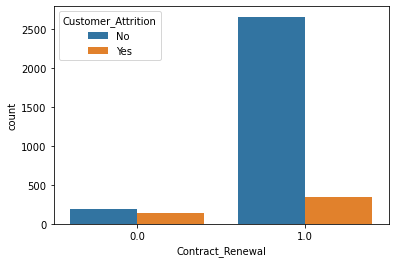

In [23]:
sns.countplot(x = 'Contract_Renewal', hue = 'Customer_Attrition', data=df)

- If Contract_Renewal is 1.0, then most of the time Customer_Attrition is "No" but when Contract_Renewal is 0.0, then the Customer_Attrition value "Yes" and "No" are very close to each other.

<AxesSubplot:xlabel='Customer_Attrition', ylabel='Contract_Renewal'>

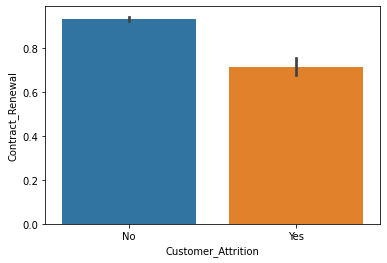

In [24]:
sns.barplot( x= 'Customer_Attrition', y = 'Contract_Renewal',data=df)

- Here we can see that Customer_Attrition="No" is more close to 1.0, which means Contract_Renewal is most of the time 1.0 when Customer_Attrition="No".
- And we can see that Customer_Attrition="Yes" is more close to 0.5 than 1.0 and 0.0 , which means Contract_Renewal is more of the time 1.0 when Customer_Attrition="Yes" but not most of the time.
- This implies we cannot directly say that when Customer_Attrition="Yes", the Contract_Renewal will be 1.0, but for "No", we can say that the probability is high that the Contract_Renewal=1.0.

#### What to do??
- Our data now contains 7 values where Contract_Renewal is NaN and the Customer_Attrition is "No", and only 1 value where Contract_Renewal is NaN and the Customer_Attrition is "Yes".
- Those 7 will mostly lie in Contract_Renewal=1.0, but we are not sure about the one with Customer_Attrition as "Yes", because the Count of Yes for both the values of Contract_Renewal is nearly same.
- Since we can't replace it by mean here. So there are 2 options:
    - Give those 7 NaN's, the value 1.0 and drop the last one.
    - Drop all the 8 NaN's.

#### Conclusion:
- Out of the above 2 options, 2nd option is in our favour because it will reduce the imbalance problem.

In [25]:
df.dropna(subset=['Contract_Renewal'], inplace=True)

### e) Column `Data_Plan`

In [26]:
df[df.Data_Plan.isna()]

Customer_ID  Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
Sno                                                                
96     3259192.0  121.0               1.0        NaN        0.00   
411          NaN  100.0               1.0        NaN        0.32   
586    2063258.0  151.0               1.0        NaN        0.24   

     Calls_To_Customer_Care  DayMins  DayCalls  MonthlyCharge  OverageFee  \
Sno                                                                         
96                      3.0    190.7     103.0           49.0        9.18   
411                     0.0    278.0      76.0           66.2        8.84   
586                     4.0    156.4     108.0           49.4       11.67   

     RoamMins Customer_Attrition Inserted_Date  
Sno                                             
96        9.8                 No    2012-05-01  
411       8.3                Yes    2012-05-01  
586       7.7                 No    2012-05-01

In [27]:
df.Data_Plan.value_counts()

0.0    2401
1.0     918
Name: Data_Plan, dtype: int64

#### Data_Plan vs Customer_Attrition

<AxesSubplot:xlabel='Data_Plan', ylabel='count'>

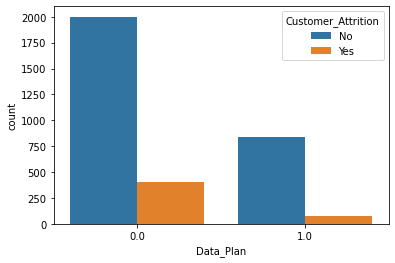

In [28]:
sns.countplot(x = 'Data_Plan', hue = 'Customer_Attrition', data=df)

- No matter if Data_Plan is 0.0 or 1.0, most of the time Customer_Attrition is "No".

<AxesSubplot:xlabel='Customer_Attrition', ylabel='Data_Plan'>

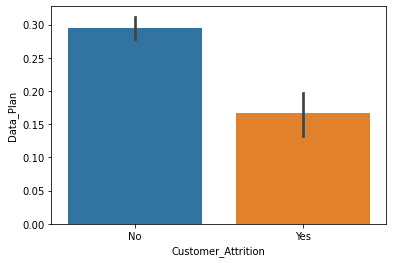

In [29]:
sns.barplot(y = 'Data_Plan', x= 'Customer_Attrition', data=df)

- Here we can see that both the values of Customer_Attrition("Yes" and "No") are closer to 0.0, which means Data_Plan is 0.0 most of the time for both the values of Customer_Attrition.
- This implies we can say that Data_Plan is 0.0 for most of the cases irrespective of the value of Customer_Attrition.

#### What to do??
- Our data now contains 2 values where Data_Plan is NaN and the Customer_Attrition is "No", and only 1 value where Data_Plan is NaN and the Customer_Attrition is "Yes".
- Both the "Yes" and "No" parts will be most likely to lie in the Data_Plan=0.0.
- Since we can't replace NaN here by taking mean. So there are 2 options:
    - Replace all the 3 NaN's as 0.0.
    - Drop all the 3 rows containing 3 NaN's.
    
#### Conclusion:
- Out of the 2 options, dropping all the rows will not affect the imblance. So we can use the option one because it will prevent the data loss and the value 0.0 is also in majority.

In [30]:
df.Data_Plan = df.Data_Plan.fillna(0.0)

### Let's again Check now

In [31]:
df[df.isna().any(axis=1)]

Customer_ID  Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
Sno                                                                 
196           NaN   65.0               1.0        0.0        0.00   
411           NaN  100.0               1.0        0.0        0.32   
550           NaN   92.0               1.0        0.0        0.16   
1373          NaN  104.0               1.0        0.0        0.33   
1480          NaN  136.0               1.0        0.0        0.36   

      Calls_To_Customer_Care  DayMins  DayCalls  MonthlyCharge  OverageFee  \
Sno                                                                          
196                      1.0    136.1     112.0           47.0       13.65   
411                      0.0    278.0      76.0           66.2        8.84   
550                      3.0    201.9      74.0           55.6       11.34   
1373                     4.0    167.6     116.0           51.3       10.96   
1480                     2.0    252.4      74.0           61.6        8.40   

      RoamMins Customer_Attrition Inserted_Date  
Sno                                              
196        4.4                 No    2012-05-01  
411        8.3                Yes    2012-05-01  
550       13.7                 No    2012-05-01  
1373      11.7                 No    2012-05-01  
1480      10.7                 No    2012-05-01

In [32]:
df.isnull().sum().sort_values(ascending=False)

Customer_ID               5
Inserted_Date             0
Customer_Attrition        0
RoamMins                  0
OverageFee                0
MonthlyCharge             0
DayCalls                  0
DayMins                   0
Calls_To_Customer_Care    0
Data_Usage                0
Data_Plan                 0
Contract_Renewal          0
Weeks                     0
dtype: int64

- So now only Customer_Id is left, which we are not going to use in the model.

## 5. Remove Unnecessary Columns

#### Customer_ID
- It is the ID given to the customers. It is unique for every customers.
- It is not helpful in building model, to predict the output.

#### Inserted_Date
- The Inserted_Date is same throughout the data., i.e, 2012-05-01

In [33]:
df.drop(columns=['Customer_ID', 'Inserted_Date'], inplace=True)

In [34]:
df

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
1      57.0               1.0        1.0        2.57                     0.0   
2      54.0               1.0        0.0        0.00                     3.0   
3      20.0               1.0        0.0        0.32                     0.0   
4      49.0               1.0        0.0        0.21                     1.0   
5     142.0               1.0        0.0        0.00                     2.0   
...     ...               ...        ...         ...                     ...   
3327   77.0               1.0        0.0        0.00                     5.0   
3328  130.0               1.0        0.0        0.00                     0.0   
3329  111.0               1.0        0.0        0.39                     2.0   
3330  132.0               1.0        0.0        0.00                     0.0   
3331  174.0               1.0        0.0        0.00                     3.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
1       213.0     115.0           78.7        9.56       9.5   
2       134.3      73.0           37.0        7.78      14.7   
3       190.0     109.0           58.2       12.91       6.3   
4       119.3     117.0           41.1       10.76      11.1   
5        84.8      95.0           27.0        6.84      14.2   
...       ...       ...            ...         ...       ...   
3327     62.4      89.0           26.0        8.50       5.7   
3328    183.0     112.0           38.0        3.65       9.5   
3329    110.4     103.0           34.9        6.87       7.7   
3330     81.1      86.0           35.0       12.26      10.3   
3331    124.3      76.0           45.0       13.86      15.5   

     Customer_Attrition  
Sno                      
1                    No  
2                    No  
3                    No  
4                    No  
5                    No  
...                 ...  
3327                Yes  
3328                 No  
3329                 No  
3330                 No  
3331                 No  

[3322 rows x 11 columns]

## 6. Handling the Imbalanced Class

- For handling imbalanced class we can do either upsampling of minority class or downsampling of majority class to make them equal. But minority class does not have enough data points so downsampling can lead to loss of lots of data, So upsampling of minority class appears to be a good option.
- Here we will be using the "imbalanced-learn" library to upsample the data using SMOTE.
- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

### Let us see the Imbalance

In [35]:
df.Customer_Attrition.value_counts()

No     2840
Yes     482
Name: Customer_Attrition, dtype: int64

In [36]:
df.Customer_Attrition.value_counts()/len(df)

No     0.854907
Yes    0.145093
Name: Customer_Attrition, dtype: float64

### Changes made to Original Data

- Since some columns can only have a particular integral value(not in decimals), upsampling using SMOTE can make data points that lie in between them(floating/decimal values).
- Like the columns Contract_Renewal and Data_Plan can only have values 0 or 1, the values cannot be in between but using SMOTE can make some data points like 0.23, that lie in between them. So to handle this we can change this column to bool type. (False for 0.0 and True for 1.0)
- Calls_To_Customer_Care only contains values between 0 to 9 and integers only.
- Weeks, DayCalls also contains only integer values.
- We cannot convert these type of columns to bool so we can use them as it is but later we can rounf off them to nearest integer.

In [37]:
for col in df.columns:
    uniq = df[col].unique()
    if len(uniq) < 20:
        print('{:25s} {}'.format(col, uniq))

Contract_Renewal          [1. 0.]
Data_Plan                 [1. 0.]
Calls_To_Customer_Care    [0. 3. 1. 2. 5. 4. 7. 9. 6. 8.]
Customer_Attrition        ['No' 'Yes']


In [38]:
df.Contract_Renewal = df.Contract_Renewal.astype('bool')

In [39]:
df.Data_Plan = df.Data_Plan.astype('bool')

In [40]:
df

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
1      57.0              True       True        2.57                     0.0   
2      54.0              True      False        0.00                     3.0   
3      20.0              True      False        0.32                     0.0   
4      49.0              True      False        0.21                     1.0   
5     142.0              True      False        0.00                     2.0   
...     ...               ...        ...         ...                     ...   
3327   77.0              True      False        0.00                     5.0   
3328  130.0              True      False        0.00                     0.0   
3329  111.0              True      False        0.39                     2.0   
3330  132.0              True      False        0.00                     0.0   
3331  174.0              True      False        0.00                     3.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
1       213.0     115.0           78.7        9.56       9.5   
2       134.3      73.0           37.0        7.78      14.7   
3       190.0     109.0           58.2       12.91       6.3   
4       119.3     117.0           41.1       10.76      11.1   
5        84.8      95.0           27.0        6.84      14.2   
...       ...       ...            ...         ...       ...   
3327     62.4      89.0           26.0        8.50       5.7   
3328    183.0     112.0           38.0        3.65       9.5   
3329    110.4     103.0           34.9        6.87       7.7   
3330     81.1      86.0           35.0       12.26      10.3   
3331    124.3      76.0           45.0       13.86      15.5   

     Customer_Attrition  
Sno                      
1                    No  
2                    No  
3                    No  
4                    No  
5                    No  
...                 ...  
3327                Yes  
3328                 No  
3329                 No  
3330                 No  
3331                 No  

[3322 rows x 11 columns]

### Over-Sampling using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy='minority')
X_res, y_res = sm.fit_resample(df.iloc[:, :-1], df.Customer_Attrition)

In [42]:
y_res.value_counts()

Yes    2840
No     2840
Name: Customer_Attrition, dtype: int64

In [43]:
df_res = pd.concat([X_res, y_res], axis=1)
df_res

Weeks  Contract_Renewal  Data_Plan  Data_Usage  \
0      57.000000              True       True    2.570000   
1      54.000000              True      False    0.000000   
2      20.000000              True      False    0.320000   
3      49.000000              True      False    0.210000   
4     142.000000              True      False    0.000000   
...          ...               ...        ...         ...   
5675   37.990046              True      False    0.000000   
5676  153.223461              True       True    0.677781   
5677  102.128835              True       True    2.849980   
5678  114.809661              True      False    0.000000   
5679  114.164353             False      False    0.000000   

      Calls_To_Customer_Care     DayMins    DayCalls  MonthlyCharge  \
0                   0.000000  213.000000  115.000000      78.700000   
1                   3.000000  134.300000   73.000000      37.000000   
2                   0.000000  190.000000  109.000000      58.200000   
3                   1.000000  119.300000  117.000000      41.100000   
4                   2.000000   84.800000   95.000000      27.000000   
...                      ...         ...         ...            ...   
5675                4.401991  156.997088  115.000000      39.392036   
5676                1.385103  189.369572  101.534077      56.541677   
5677                5.419223   87.606544   91.274029      59.806544   
5678                0.952415  249.895242   95.666186      64.000000   
5679                4.883565  122.584236  111.301388      32.116435   

      OverageFee   RoamMins Customer_Attrition  
0       9.560000   9.500000                 No  
1       7.780000  14.700000                 No  
2      12.910000   6.300000                 No  
3      10.760000  11.100000                 No  
4       6.840000  14.200000                 No  
...          ...        ...                ...  
5675    7.407672  10.419602                Yes  
5676    9.945470   8.898100                Yes  
5677    9.246789  10.566053                Yes  
5678   12.129524  15.123937                Yes  
5679    6.573699   9.834259                Yes  

[5680 rows x 11 columns]

###  Un-Making Changes to Columns

- #### ReSamlped Data

In [44]:
# Converting from bool to int(False->0 and True->1)
df_res.Data_Plan = df_res.Data_Plan.astype('uint8')
df_res.Contract_Renewal = df_res.Contract_Renewal.astype('uint8')

In [45]:
# Rounding off to integers
df_res.Weeks = df_res.Weeks.round()
df_res.Calls_To_Customer_Care = df_res.Calls_To_Customer_Care.round()
df_res.DayCalls = df_res.DayCalls.round()

In [46]:
df_res

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
0      57.0                 1          1    2.570000                     0.0   
1      54.0                 1          0    0.000000                     3.0   
2      20.0                 1          0    0.320000                     0.0   
3      49.0                 1          0    0.210000                     1.0   
4     142.0                 1          0    0.000000                     2.0   
...     ...               ...        ...         ...                     ...   
5675   38.0                 1          0    0.000000                     4.0   
5676  153.0                 1          1    0.677781                     1.0   
5677  102.0                 1          1    2.849980                     5.0   
5678  115.0                 1          0    0.000000                     1.0   
5679  114.0                 0          0    0.000000                     5.0   

         DayMins  DayCalls  MonthlyCharge  OverageFee   RoamMins  \
0     213.000000     115.0      78.700000    9.560000   9.500000   
1     134.300000      73.0      37.000000    7.780000  14.700000   
2     190.000000     109.0      58.200000   12.910000   6.300000   
3     119.300000     117.0      41.100000   10.760000  11.100000   
4      84.800000      95.0      27.000000    6.840000  14.200000   
...          ...       ...            ...         ...        ...   
5675  156.997088     115.0      39.392036    7.407672  10.419602   
5676  189.369572     102.0      56.541677    9.945470   8.898100   
5677   87.606544      91.0      59.806544    9.246789  10.566053   
5678  249.895242      96.0      64.000000   12.129524  15.123937   
5679  122.584236     111.0      32.116435    6.573699   9.834259   

     Customer_Attrition  
0                    No  
1                    No  
2                    No  
3                    No  
4                    No  
...                 ...  
5675                Yes  
5676                Yes  
5677                Yes  
5678                Yes  
5679                Yes  

[5680 rows x 11 columns]

- #### Original Data

In [47]:
# Converting from bool to int(False->0 and True->1)
df.Data_Plan = df.Data_Plan.astype('uint8')
df.Contract_Renewal = df.Contract_Renewal.astype('uint8')

In [48]:
df

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
1      57.0                 1          1        2.57                     0.0   
2      54.0                 1          0        0.00                     3.0   
3      20.0                 1          0        0.32                     0.0   
4      49.0                 1          0        0.21                     1.0   
5     142.0                 1          0        0.00                     2.0   
...     ...               ...        ...         ...                     ...   
3327   77.0                 1          0        0.00                     5.0   
3328  130.0                 1          0        0.00                     0.0   
3329  111.0                 1          0        0.39                     2.0   
3330  132.0                 1          0        0.00                     0.0   
3331  174.0                 1          0        0.00                     3.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
1       213.0     115.0           78.7        9.56       9.5   
2       134.3      73.0           37.0        7.78      14.7   
3       190.0     109.0           58.2       12.91       6.3   
4       119.3     117.0           41.1       10.76      11.1   
5        84.8      95.0           27.0        6.84      14.2   
...       ...       ...            ...         ...       ...   
3327     62.4      89.0           26.0        8.50       5.7   
3328    183.0     112.0           38.0        3.65       9.5   
3329    110.4     103.0           34.9        6.87       7.7   
3330     81.1      86.0           35.0       12.26      10.3   
3331    124.3      76.0           45.0       13.86      15.5   

     Customer_Attrition  
Sno                      
1                    No  
2                    No  
3                    No  
4                    No  
5                    No  
...                 ...  
3327                Yes  
3328                 No  
3329                 No  
3330                 No  
3331                 No  

[3322 rows x 11 columns]

## 7. Exploratory Data Analysis

## 1.) Univariate Analysis

### a. Histograms

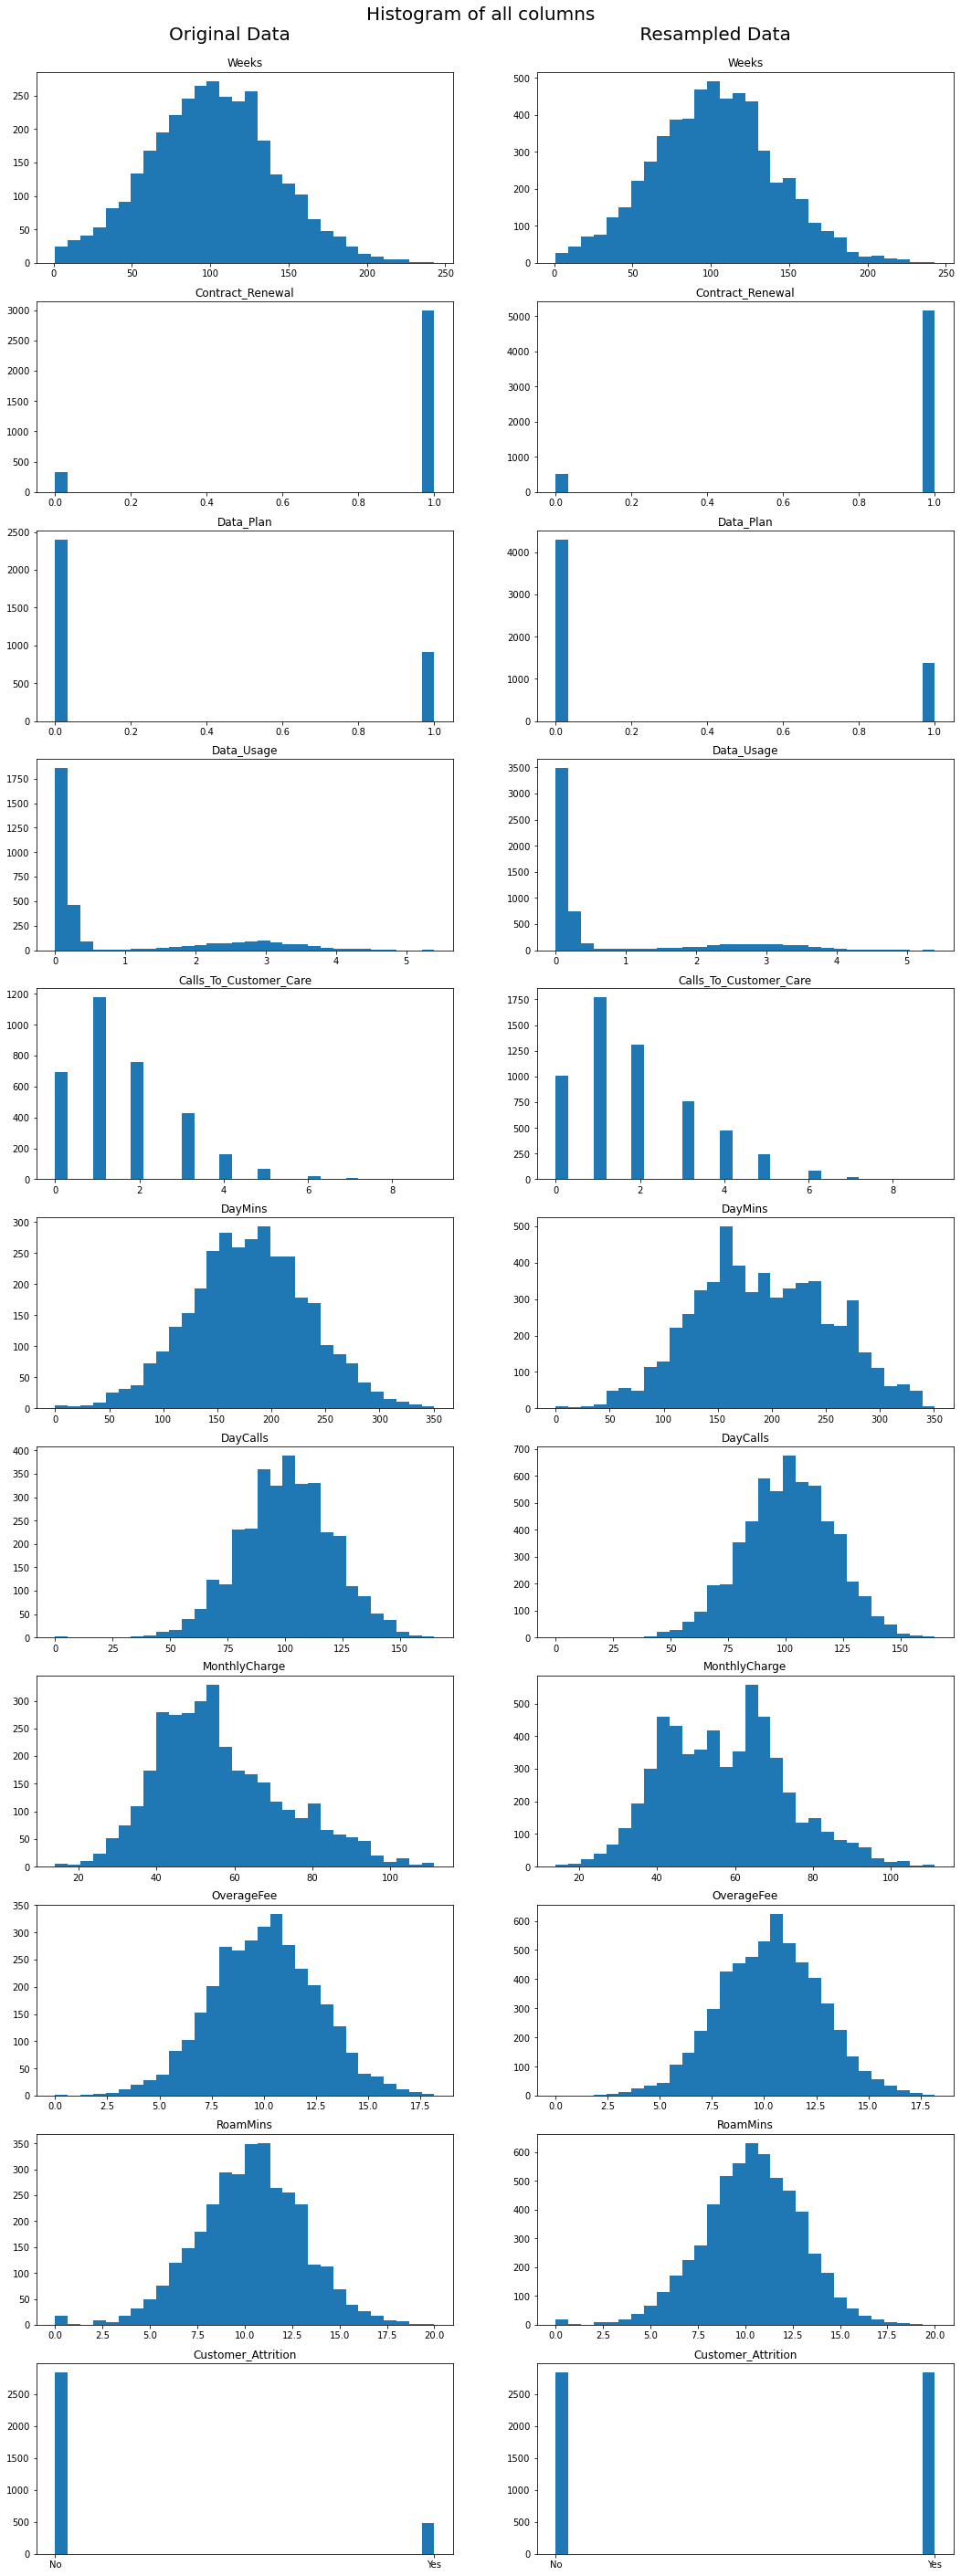

In [49]:
cols = df_res.columns
plt.figure(figsize=[18,50])
for i, column in enumerate(cols):
    # original Data
    plt.subplot(11, 2, 2*i+1)
    plt.hist(df[column], bins=30)
    plt.title(column)
    # Resampled Data
    plt.subplot(11, 2, 2*i+2)
    plt.hist(df_res[column], bins=30)
    plt.title(column)
plt.suptitle('Histogram of all columns\nOriginal Data'+' '*60+'Resampled Data', size=20, y=0.9)
plt.show()

- The graphs are almost alike but the peaks have increased due to oversampling.
- Most of the datapoints in week column are between 100 and 125.
- Contract is renewed most of the times.
- Data Plan is not taken by most of the Customers.
- Data Usage is 0 most of the times. It can be because the Data_Plan is 0 for most of the customers.
    - Check the Correlation between the two.
- Calls_to Customer_Care is done 1 time in most of the cases.
- DayMins are between 150 to 250 for most of the customers. And there is a very minor change in Graph for Original Data and Resampled Data with peaks lying in the same region.
- DayCalls are between 100 to 125 for most of the Customers.
- Monthly Charges are about 60 for more customers. And there is a very minor change in Graph for Original Data and Resampled Data with peaks lying in almost the same region.
- OverageFee is about 10 for most of the Customers.
- RoamMins about 10 to 11 for most of the Customers.
- Customer_Atrition was "No" for most of the Customers in the original Data but it is equal in Resampled data.

#### Plot between Data_Plan and Data_Usage

<AxesSubplot:xlabel='Data_Plan', ylabel='Data_Usage'>

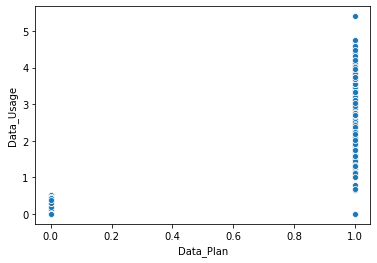

In [50]:
sns.scatterplot(x='Data_Plan', y='Data_Usage', data=df)#, hue='Customer_Attrition')

<AxesSubplot:xlabel='Data_Plan', ylabel='Data_Usage'>

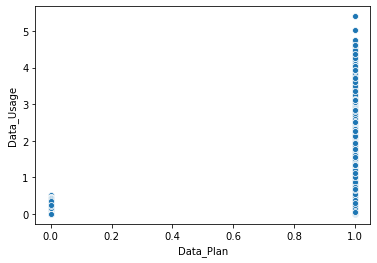

In [51]:
sns.scatterplot(x='Data_Plan', y='Data_Usage', data=df_res)

- We can see that if the Data_Plan is 0 then the Data_Usage is near to 0 but if Data_Plan is 1 then the Data usage varies from 0 to about 5. This shows the high correlation between the two. We will also check the correlation later using heatmap.

### b. Boxlpot for Numerical Columns

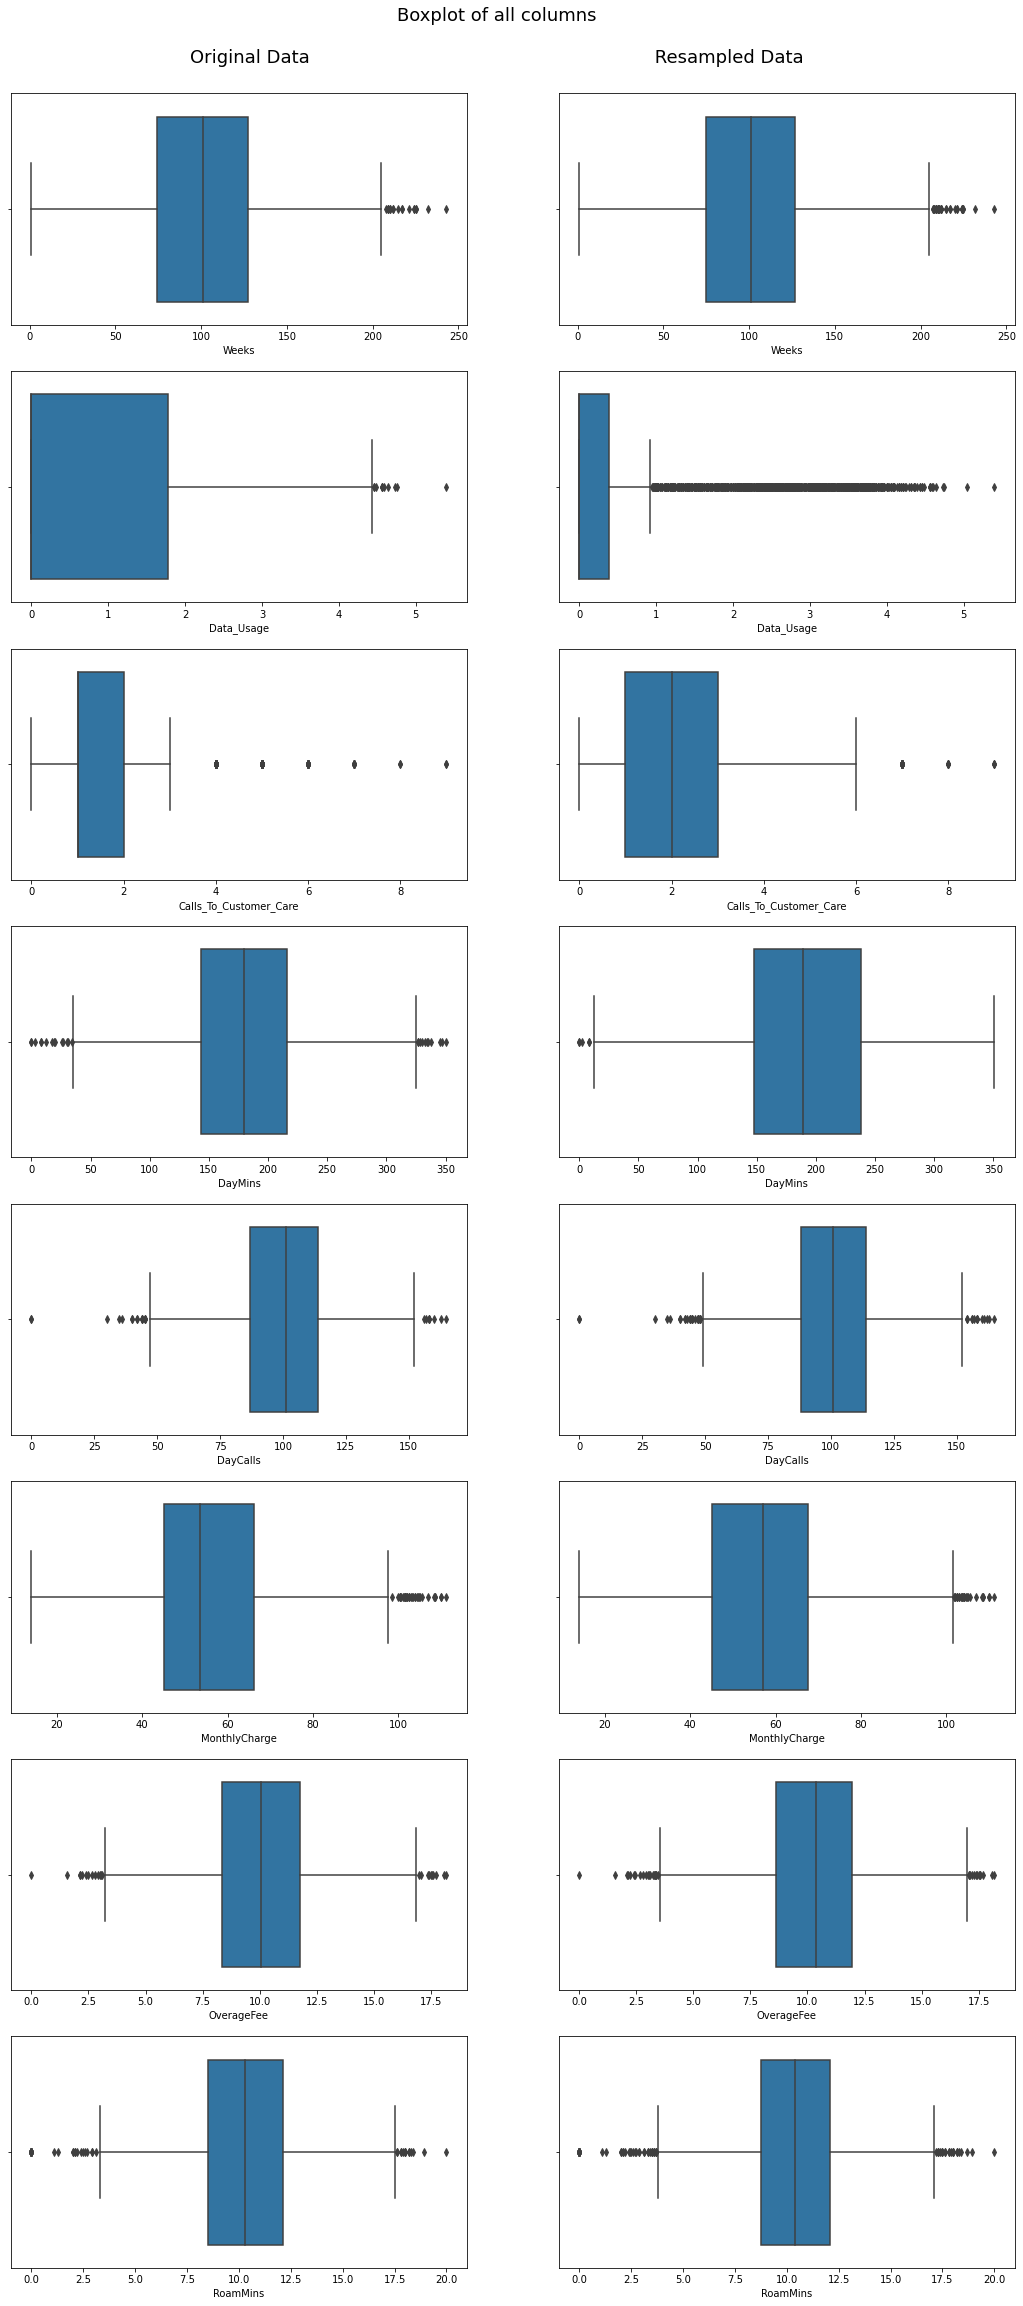

In [52]:
numerical_columns = list(df.columns)
numerical_columns.remove('Contract_Renewal')
numerical_columns.remove('Data_Plan')
numerical_columns.remove('Customer_Attrition')
plt.figure(figsize=[18,40])
for i, column in enumerate(numerical_columns):
    # Original Data
    plt.subplot(8, 2, 2*i+1)
    sns.boxplot(df[column])
#     plt.title(column)
    # Resampled Data
    plt.subplot(8, 2, 2*i+2)
    sns.boxplot(df_res[column])
#     plt.title(column)
plt.suptitle('Boxplot of all columns\n\nOriginal Data'+' '*60+'Resampled Data', size=18, y=0.91)
plt.show()

- Nearly all of the plots of Original Data are similar to Resampled Data.
- Some Changes were noticed in:
    - Calls_to_Customer_Care: Changes are not much
    - Data_Usage: Lots of Changes
- Majority Of changes are seen in the column "Data_Usage' since the values near 0 were more in the original Data, So those values are increased even more in the Resampled data causing the 25th, 50th and 75th percentile recline towards it.
- Some possible outliers that can be seen in the data are:
    - DayCalls = 0
    - OverageFee = 0
    - RoamMins = 0
    - Data_Usage = max value (above 5)
    
#### Let us see them in both the original and Resampled data.

In [53]:
# Original Data
idx_df = df[[(a|b|c|d) for a,b,c,d in zip(df.DayCalls==0, df.OverageFee==0,  df.RoamMins==0,
                                          df.Data_Usage==df.Data_Usage.max())]].index
df.iloc[idx_df]

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
90     64.0                 1          0        0.29                     1.0   
155   126.0                 1          0        0.00                     5.0   
320    81.0                 1          1        3.29                     1.0   
465    55.0                 0          0        0.32                     1.0   
573    75.0                 1          1        2.48                     0.0   
691    67.0                 1          0        0.00                     1.0   
857    42.0                 1          0        0.00                     1.0   
1007   70.0                 1          0        0.00                     2.0   
1059   60.0                 1          0        0.00                     2.0   
1325   13.0                 1          0        0.00                     1.0   
1377  126.0                 1          0        0.00                     0.0   
1380   86.0                 1          0        0.00                     1.0   
1546   57.0                 1          0        0.31                     1.0   
2328  118.0                 1          0        0.00                     2.0   
2345  114.0                 1          0        0.00                     2.0   
2496   88.0                 1          0        0.26                     3.0   
2716   90.0                 1          0        0.28                     2.0   
2889  104.0                 1          0        0.30                     2.0   
2901  170.0                 1          0        0.00                     2.0   
2915  117.0                 0          0        0.00                     1.0   
3258   57.0                 1          0        0.00                     0.0   
3273  111.0                 1          1        1.92                     1.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
90      162.6      83.0           43.9        7.62      14.2   
155      58.2      94.0           22.0        6.94      11.9   
320     161.6     117.0           70.9        6.15      12.2   
465     191.9      91.0           58.2       12.81      14.3   
573     214.1      62.0           78.8       10.05       9.2   
691     210.7     116.0           55.0       10.96       7.2   
857     146.3      84.0           47.0       12.80       8.0   
1007    198.6     111.0           52.0       10.70      10.6   
1059    252.7      97.0           62.0       11.06      12.4   
1325     58.4     121.0           33.0       13.11      11.9   
1377    175.4     120.0           39.0        4.92      10.6   
1380    125.5     139.0           45.0       13.49       8.9   
1546    154.2      78.0           46.1        9.84      10.1   
2328    224.6      94.0           58.0       11.30      12.5   
2345    187.8     109.0           46.0        7.73      10.1   
2496    144.3     116.0           40.6        7.82       7.8   
2716    198.5     124.0           59.8       13.33       8.0   
2889    113.6      87.0           36.0        7.93      10.5   
2901    184.1     106.0           49.0       10.25       9.8   
2915    287.4     118.0           71.0       12.98      10.0   
3258    158.1     117.0           37.0        5.76      11.8   
3273    127.1      94.0           61.2       11.42       7.1   

     Customer_Attrition  
Sno                      
90                   No  
155                 Yes  
320                  No  
465                 Yes  
573                  No  
691                  No  
857                  No  
1007                 No  
1059                 No  
1325                 No  
1377                 No  
1380                 No  
1546                 No  
2328                 No  
2345                 No  
2496                 No  
2716                 No  
2889                 No  
2901                 No  
29

In [54]:
# Resampled Data
idx_df_res = df_res[[(a|b|c|d) for a,b,c,d in zip(df_res.DayCalls==0, df_res.OverageFee==0,
                                                  df_res.RoamMins==0, df_res.Data_Usage==df_res.Data_Usage.max())]].index
df.iloc[idx_df_res]

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
89     36.0                 0          1        5.40                     0.0   
153    70.0                 1          0        0.00                     3.0   
317    98.0                 1          1        0.00                     2.0   
462   165.0                 1          0        0.00                     1.0   
569    87.0                 1          1        0.00                     1.0   
686   106.0                 1          0        0.31                     2.0   
852    62.0                 1          0        0.00                     1.0   
1002   70.0                 1          0        0.00                     1.0   
1054  114.0                 1          0        0.00                     0.0   
1319   98.0                 1          0        0.00                     4.0   
1371  101.0                 1          0        0.30                     1.0   
1374  115.0                 1          0        0.00                     3.0   
1538  137.0                 1          0        0.36                     1.0   
2318   98.0                 1          0        0.00                     0.0   
2335  101.0                 1          0        0.25                     3.0   
2486   86.0                 1          0        0.17                     2.0   
2706  158.0                 1          0        0.00                     2.0   
2879   87.0                 1          1        0.00                     1.0   
2891   58.0                 1          0        0.00                     4.0   
2905   97.0                 1          0        0.00                     1.0   
3248  120.0                 1          1        0.00                     1.0   
3263  127.0                 1          0        0.00                     0.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
89      196.8      89.0          110.0       12.75      20.0   
153     232.1     122.0           65.0       14.62       0.0   
317      64.6      98.0           26.0        8.81       0.0   
462     242.9     126.0           60.0       10.49       0.0   
569     151.4      95.0           39.0        7.62       0.0   
686     114.4     104.0           30.1        3.92       0.0   
852     281.0      66.0           62.0        8.03       0.0   
1002    222.8     114.0           57.0       10.80       0.0   
1054    191.5      88.0           48.0        8.76       0.0   
1319      0.0       0.0           14.0        7.98       6.8   
1371      0.0       0.0           20.0        9.61       7.2   
1374    132.0      90.0           40.0        9.88       0.0   
1538     97.5      95.0           37.6        9.79       0.0   
2318    288.1     101.0           61.0        6.90       0.0   
2335    217.7     118.0           59.5       11.59       0.0   
2486     70.7     125.0           31.7       10.55       0.0   
2706    172.4     114.0           52.0       12.83       0.0   
2879    165.8     122.0           45.0        9.35       0.0   
2891    174.4     112.0           53.0       13.29       0.0   
2905    209.2     134.0           36.0        0.00      11.8   
3248    128.5     115.0           36.0        8.19       0.0   
3263    107.9     128.0           35.0        9.35       0.0   

     Customer_Attrition  
Sno                      
89                  Yes  
153                  No  
317                  No  
462                  No  
569                  No  
686                  No  
852                  No  
1002                 No  
1054                 No  
1319                Yes  
1371                 No  
1374                 No  
1538                 No  
2318                 No  
2335                 No  
2486                 No  
2706                 No  
2879                 No  
2891                 No  
29

### Outliers Removal

In [55]:
df.drop(idx_df, inplace=True)

In [56]:
df_res.drop(idx_df_res, inplace=True)

In [57]:
df.shape

(3300, 11)

In [58]:
df_res.shape

(5658, 11)

### c. Countplot of `Calls_To_Customer_Care`

<AxesSubplot:title={'center':'Resampled Data'}, xlabel='Calls_To_Customer_Care', ylabel='count'>

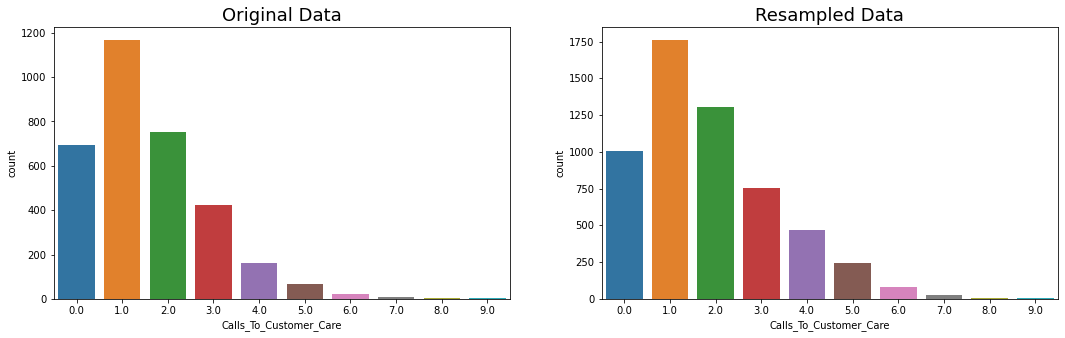

In [59]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.title("Original Data", size=18)
sns.countplot(x = 'Calls_To_Customer_Care', data = df)
plt.subplot(1, 2, 2)
plt.title("Resampled Data", size=18)
sns.countplot(x = 'Calls_To_Customer_Care', data = df_res)

sns.countplot(x=df.Calls_To_Customer_Care)

- The Calls_To_Customer_Care=1 for most of the Customers in both the data.

## 2.) Bivariate Analysis

### a. Boxplot for numerical columns

In [60]:
numerical_columns

['Weeks',
 'Data_Usage',
 'Calls_To_Customer_Care',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

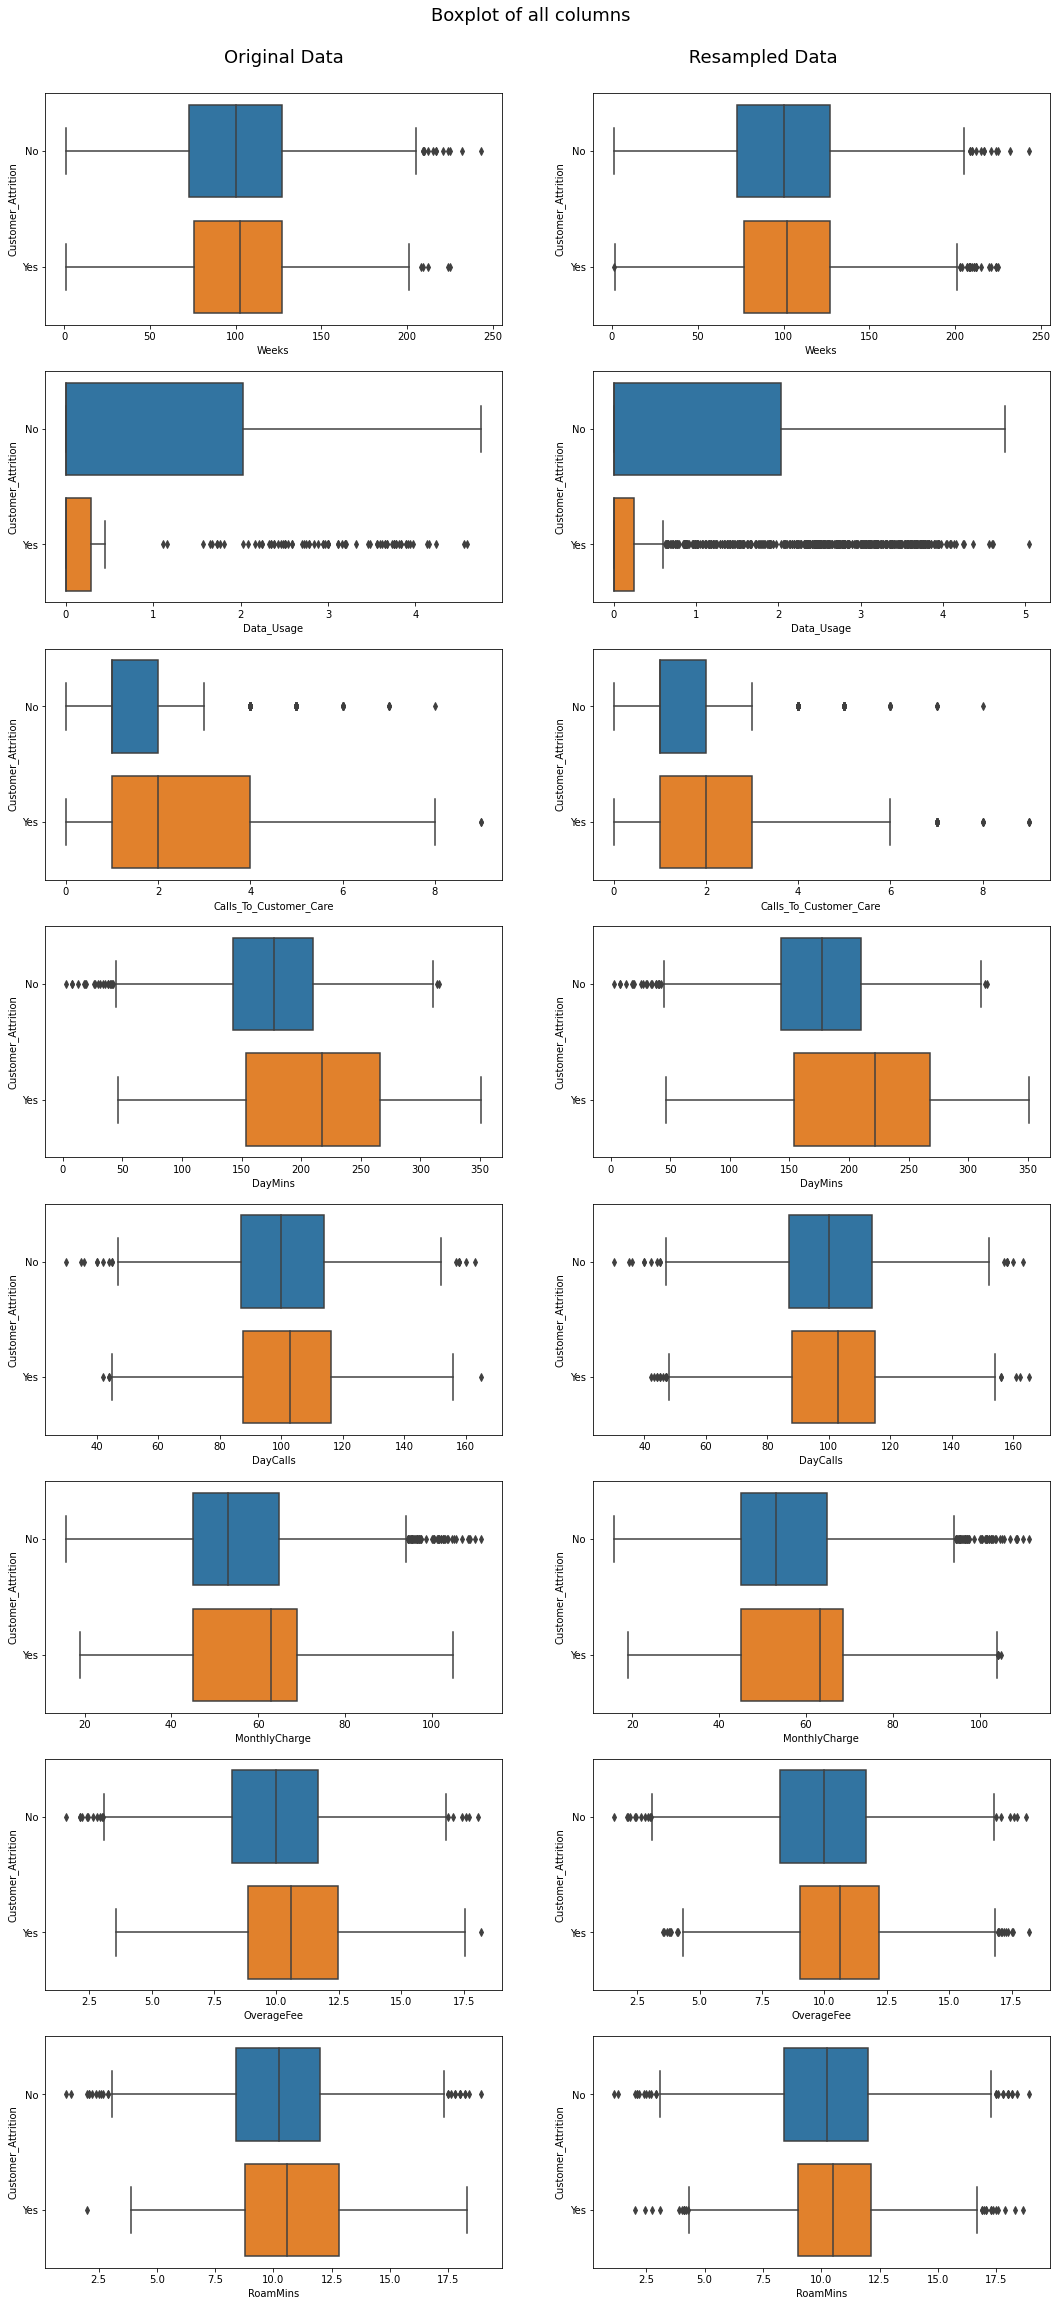

In [61]:
plt.figure(figsize=[18,40])
for i, column in enumerate(numerical_columns):
    # Original Data
    plt.subplot(8, 2, 2*i+1)
    sns.boxplot(df[column], y = df.Customer_Attrition)
#     plt.title(column)
    # Resampled Data
    plt.subplot(8, 2, 2*i+2)
    sns.boxplot(df_res[column], y = df_res.Customer_Attrition)
#     plt.title(column)
plt.suptitle('Boxplot of all columns\n\nOriginal Data'+' '*60+'Resampled Data', size=18, y=0.91)
plt.show()

- Data Usage for customers with Customer_Attriton="Yes" is mostly close to 0 in the original Data. while Customer_Attriton="No" covers the whole range of Data_Usage from 0 to 5 in both of the data.
- Customers with Customer_Attrition="No" have done mostly 1 calls to the Customer Care, while the customers with Customer_Attrition="Yes" have mostly done 1 to 4 calls to customer care according to Original Data. And that is changed from (1 to 4) to (1 to 3) in the resampled Data.
- Day mins have more data points between 150 to 200 for Customer_Attrition="No" while for Customer_Attrition="Yes", it has more data points between 150 to 275.
- Most of the Columns have similar Distribution for Customer_Attrition="Yes" and "No".

### b. Barplot for Numerical Columns

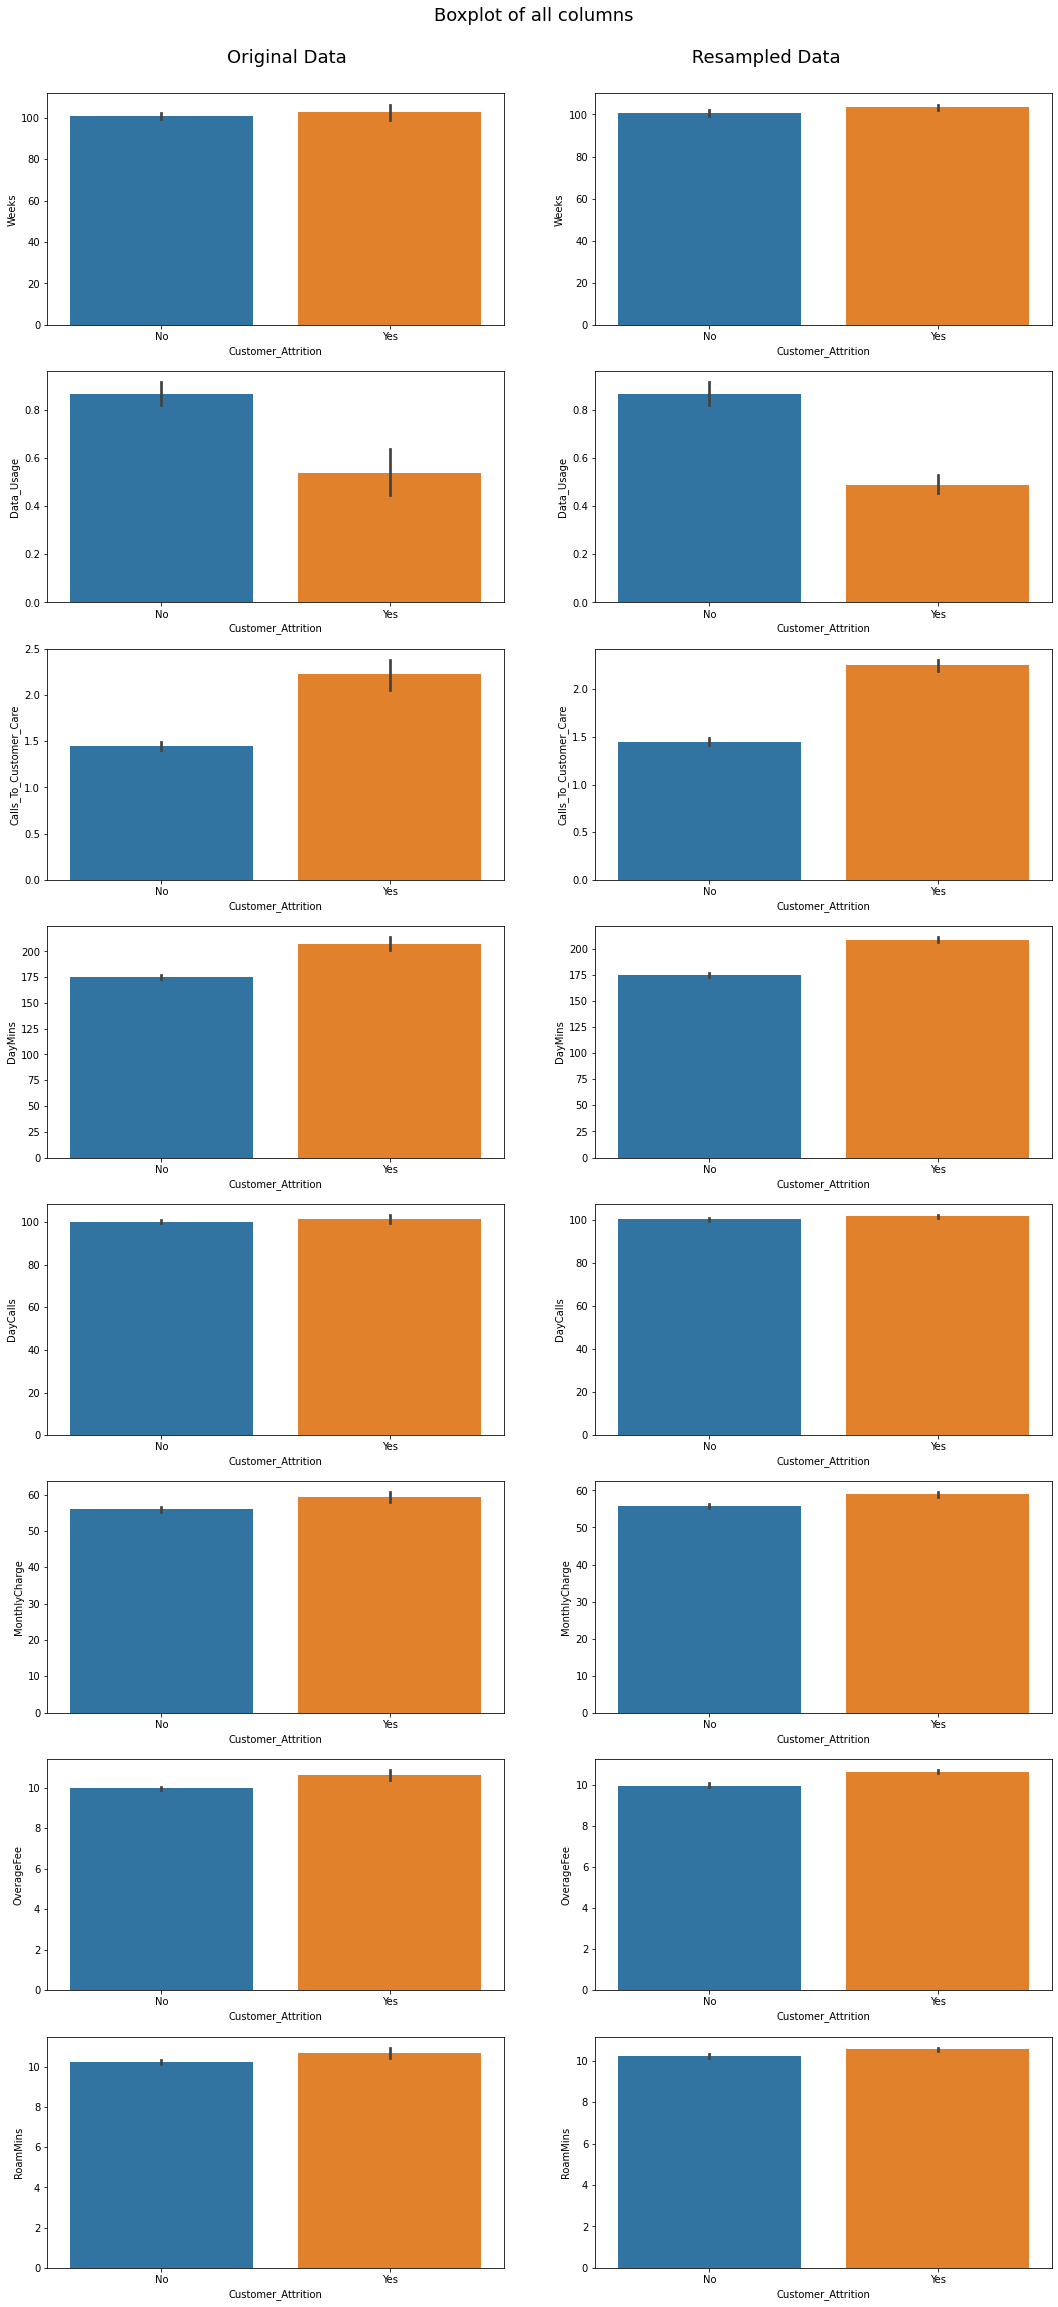

In [62]:
plt.figure(figsize=[18,40])
for i, column in enumerate(numerical_columns):
    # Original Data
    plt.subplot(8, 2, 2*i+1)
    sns.barplot(x = 'Customer_Attrition', y = column, data = df)
#     plt.title(column)
    # Resampled Data
    plt.subplot(8, 2, 2*i+2)
    sns.barplot(x = 'Customer_Attrition', y = column, data = df_res)
#     plt.title(column)
plt.suptitle('Boxplot of all columns\n\nOriginal Data'+' '*60+'Resampled Data', size=18, y=0.91)
plt.show()

- The plots are similar for both the data Original and Resampled.

### c. Countplot for column `Calls_To_Customer_Care`

<AxesSubplot:title={'center':'Resampled Data'}, xlabel='Calls_To_Customer_Care', ylabel='count'>

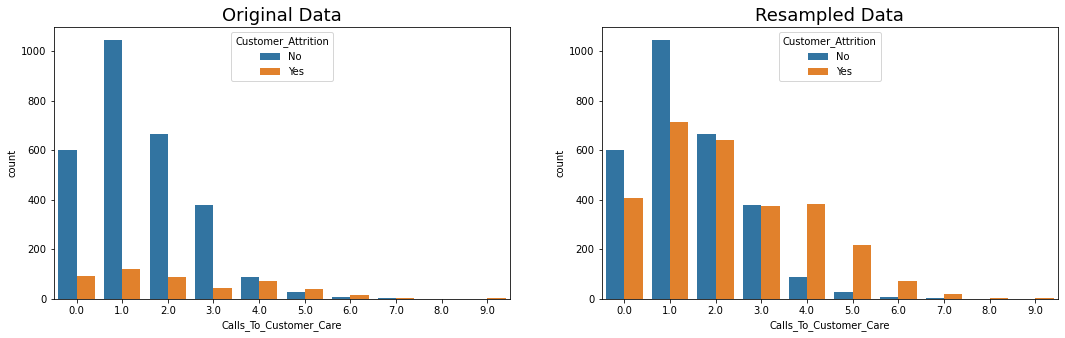

In [63]:
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.title("Original Data", size=18)
sns.countplot(x = 'Calls_To_Customer_Care', hue = 'Customer_Attrition', data = df)
plt.subplot(1, 2, 2)
plt.title("Resampled Data", size=18)
sns.countplot(x = 'Calls_To_Customer_Care', hue = 'Customer_Attrition', data = df_res)

- For Customer_Attrition="No" the peaks are when Calls_To_Customer_Care=1, but for Customer_Attrition="Yes" the peaks when Calls_To_Customer_Care is 1 and 2 are very close in both the data.

## 8. Correlation

### Change Customer_Attrition to a numerical Column

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Customer_Attrition = le.fit_transform(df.Customer_Attrition)
df_res.Customer_Attrition = le.fit_transform(df_res.Customer_Attrition)

In [65]:
df.sample(5)

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
Sno                                                                            
922    99.0                 1          0        0.00                     1.0   
3103  108.0                 1          1        2.35                     3.0   
162   164.0                 1          0        0.27                     1.0   
650    42.0                 1          0        0.00                     0.0   
25     52.0                 1          0        0.32                     3.0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  \
Sno                                                            
922     159.7      83.0           41.0        7.77       8.4   
3103    170.7      88.0           62.5        5.50       8.7   
162     160.6     111.0           44.7        8.16       9.0   
650     241.2     134.0           51.0        5.83      10.6   
25      191.9     108.0           59.2       13.49       7.8   

      Customer_Attrition  
Sno                       
922                    0  
3103                   0  
162                    0  
650                    0  
25                     0

In [66]:
df_res.sample(5)

Weeks  Contract_Renewal  Data_Plan  Data_Usage  Calls_To_Customer_Care  \
636   120.0                 1          0    0.000000                     2.0   
2091   73.0                 1          1    2.750000                     2.0   
3955   46.0                 1          0    0.254358                     2.0   
1983   41.0                 1          1    3.000000                     1.0   
1081   82.0                 1          0    0.000000                     0.0   

         DayMins  DayCalls  MonthlyCharge  OverageFee   RoamMins  \
636   252.000000     120.0      56.000000    7.510000   9.600000   
2091  131.200000      98.0      59.500000    5.330000  10.200000   
3955  228.466751     123.0      66.689673   14.510782   9.831234   
1983  191.700000     109.0      79.000000    9.650000  11.100000   
1081  101.000000      93.0      31.000000    7.780000  13.300000   

      Customer_Attrition  
636                    0  
2091                   0  
3955                   1  
1983                   0  
1081                   0

## 1.) Pair Plot
### a. Original Data

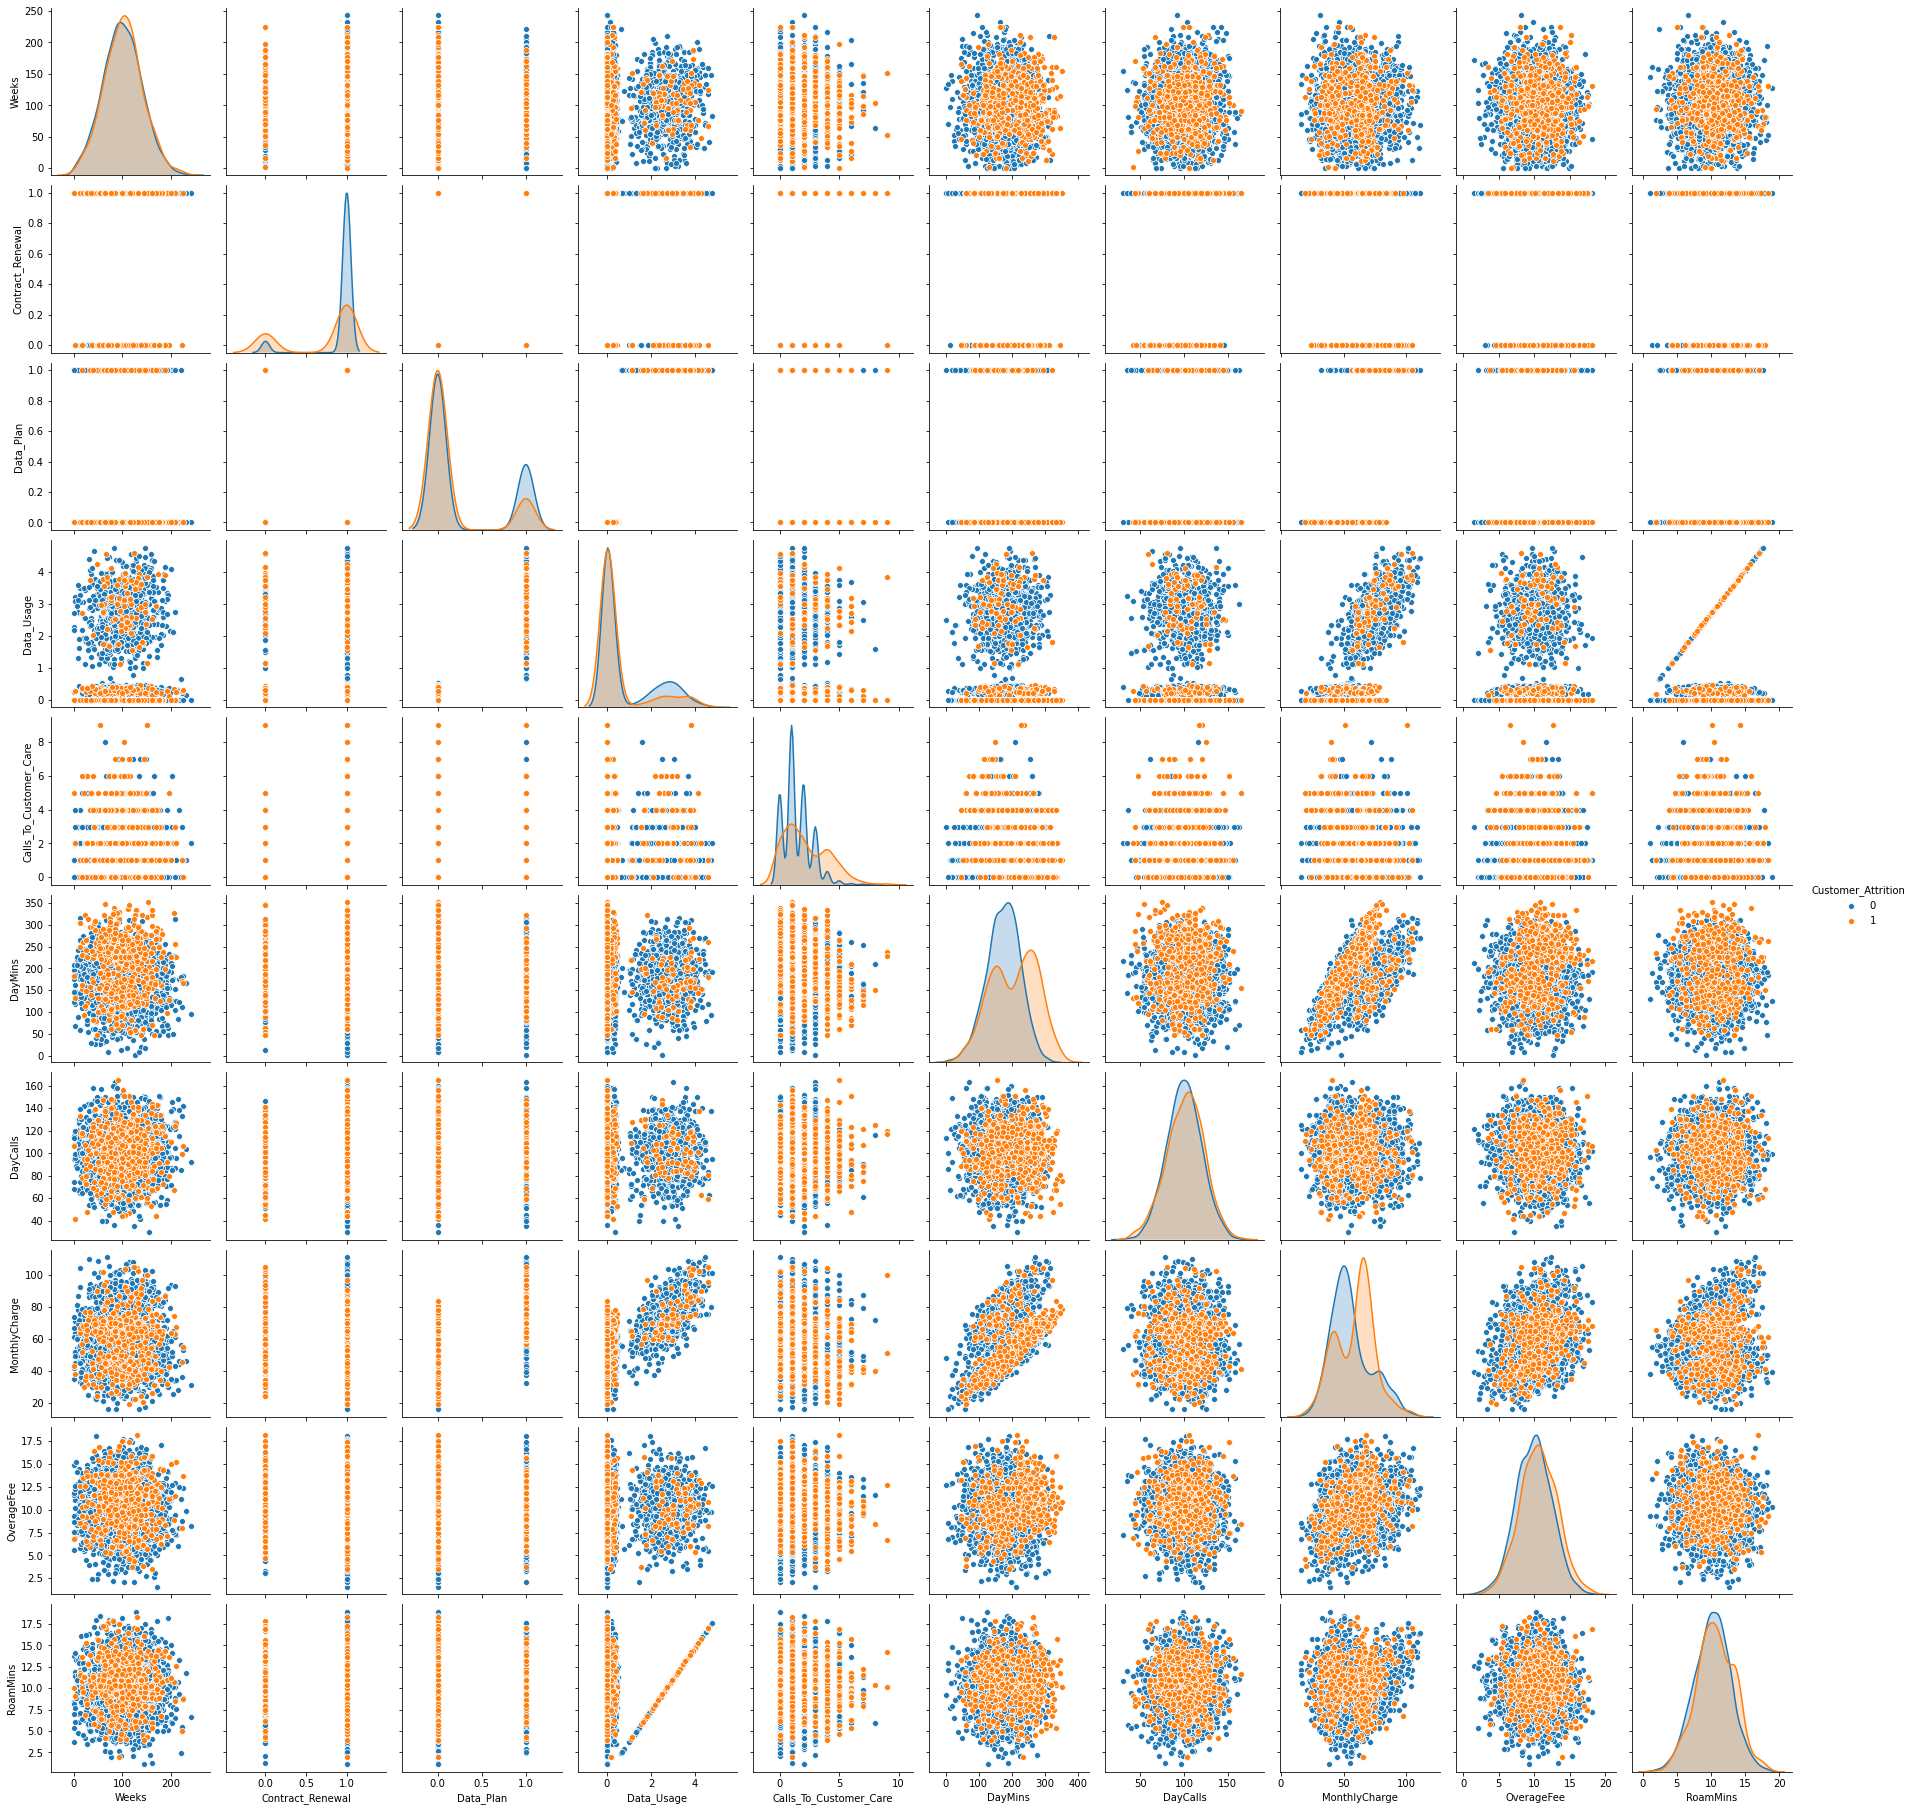

In [67]:
sns.pairplot(data = df, hue = 'Customer_Attrition')
# g.map_lower(sns.kdeplot, levels=4, color=".2")

### b. Resampled Data

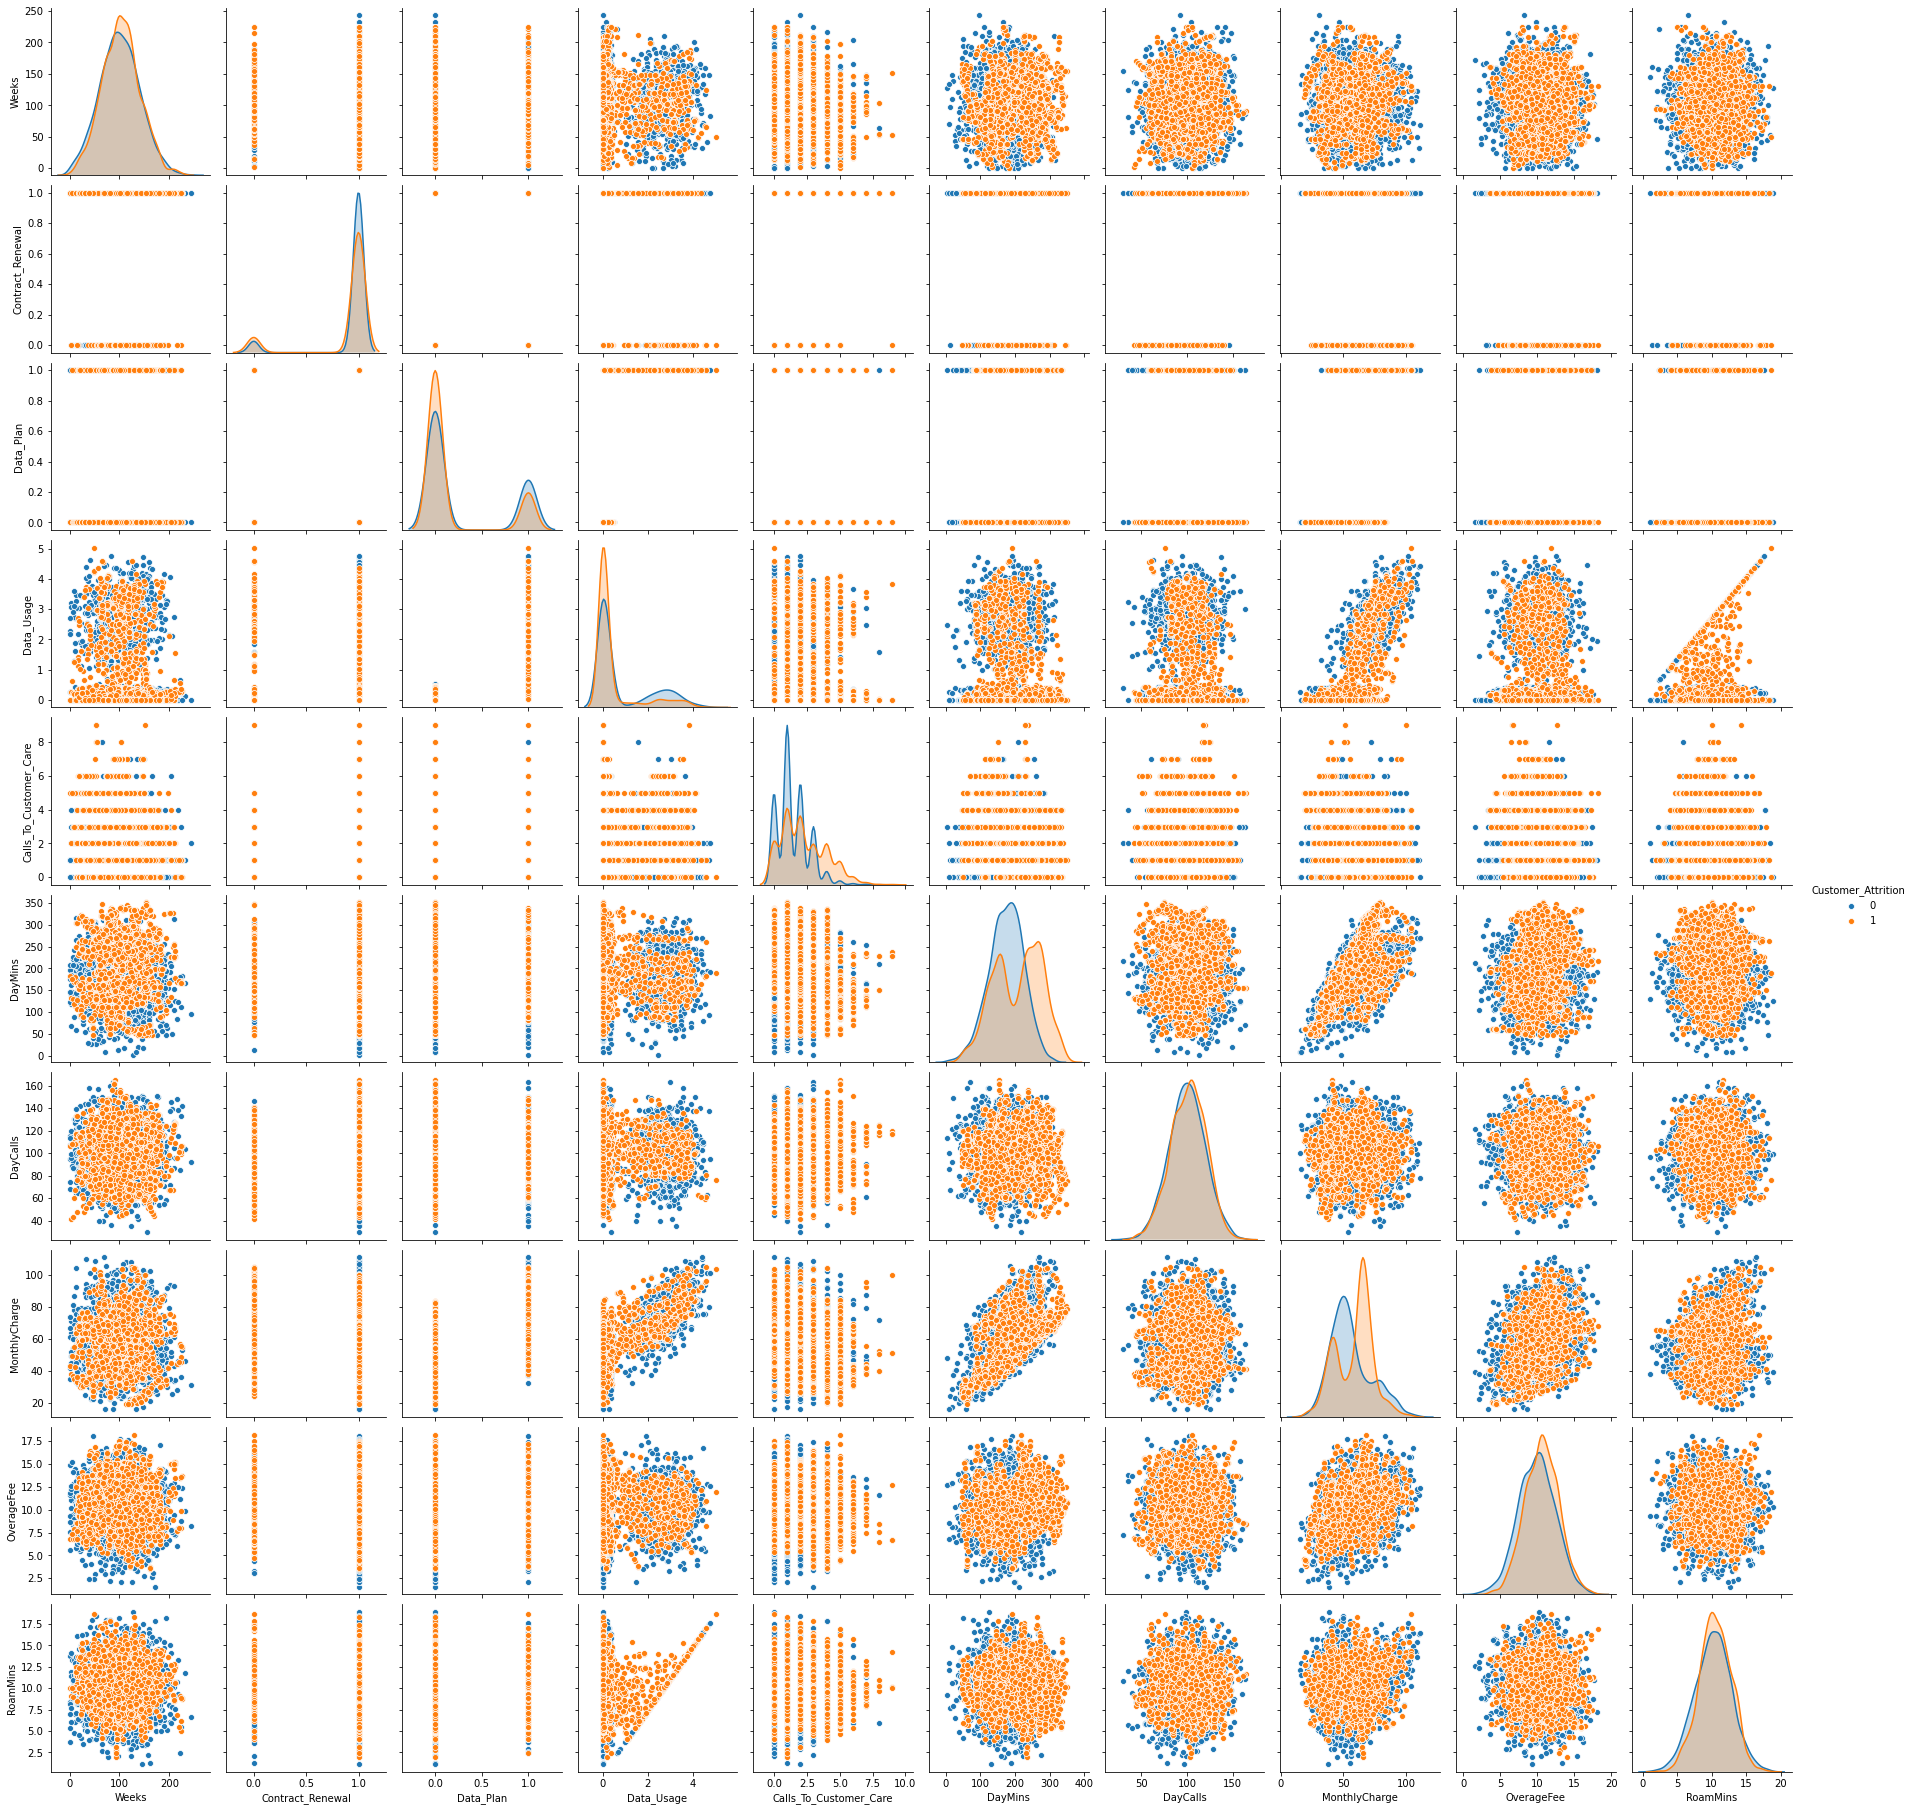

In [68]:
sns.pairplot(data = df_res, hue = 'Customer_Attrition')

- The intresting thing to notice here that for Data_Usage>0 the RoamMins are increasing in a straight line with a fixed slope.
- These two may be linked with one another such that when Data_Usage is about 0 then RoamMins can take any value, but when Data_Usage is close to 1 and above, the RoamMins increases linearly with it.

<AxesSubplot:title={'center':'Resampled Data'}, xlabel='RoamMins', ylabel='Data_Usage'>

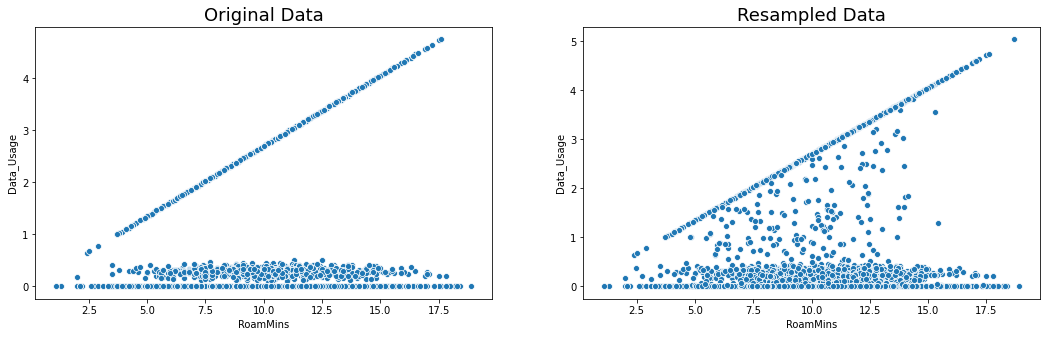

In [69]:
# sns.scatterplot(x='RoamMins', y='Data_Usage', data=df)
plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.title("Original Data", size=18)
sns.scatterplot(x = 'RoamMins', y = 'Data_Usage', data = df)
plt.subplot(1, 2, 2)
plt.title("Resampled Data", size=18)
sns.scatterplot(x = 'RoamMins', y = 'Data_Usage', data = df_res)

- It is clear that our resampled data has got it wrong, but the data points are under the line and are very sparse. So it should not cause any affect on the prediction of model.

## 2) Heat-Map

### a. Original Data

<AxesSubplot:>

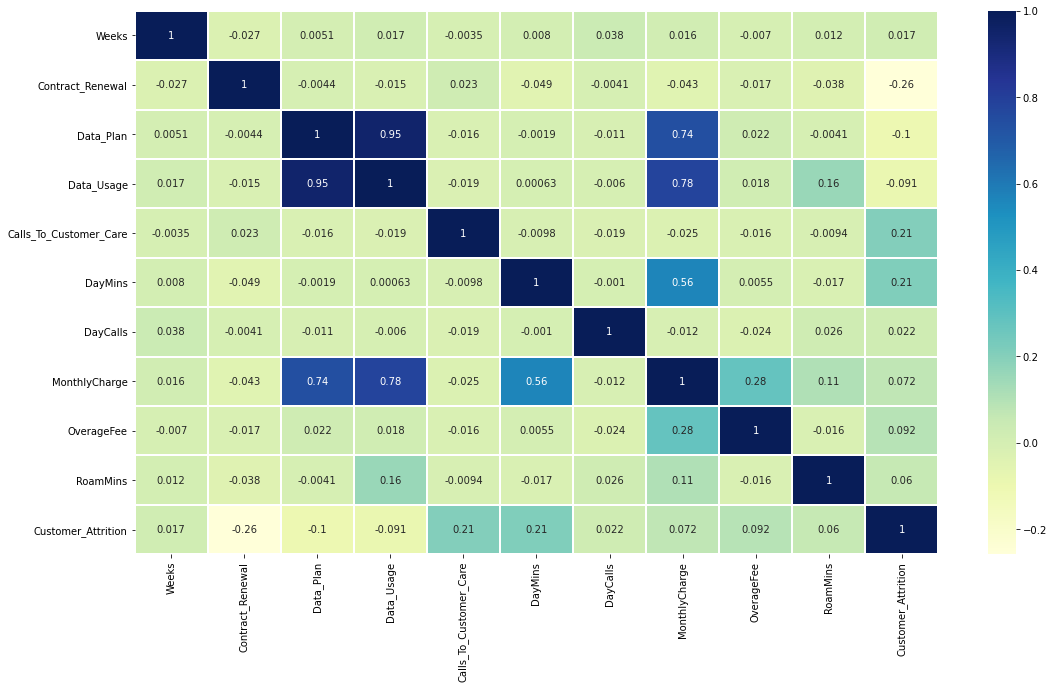

In [70]:
plt.figure(figsize=[18,10])
sns.heatmap(df.corr(),annot=True, linewidths=1, cmap='YlGnBu')

### b. Resampled Data

<AxesSubplot:>

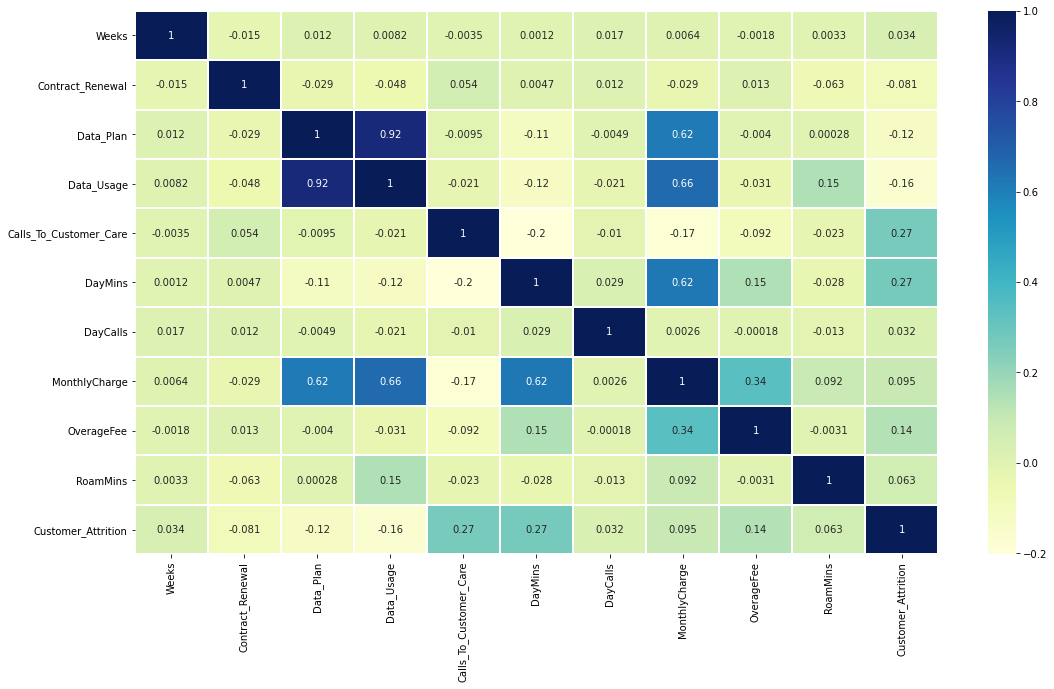

In [71]:
plt.figure(figsize=[18,10])
sns.heatmap(df_res.corr(),annot=True, linewidths=1, cmap='YlGnBu', )

- The heatmap above shows the correlation between variables in the dataset. It shows how variables are dependent on each other and by what factor and also their nature of dependency (directly or inversely proportional). 
- The columns Data_Plan and Data_Usage very highly correlated with each other in both the Datasets just like what we predicted above.
- Data_Usage is also a little Correlated with:
    - DayMins
    - RoamMins (We saw the straight line above)
    - Customer_Attrition
- MonthlyCharge is highly correlated with:
    - Data_Usage, Data_Plan (Because these two are highly correlated with each other)
    - DayMins
    - OverageFee
- Customer_Attrition is correlated with:
    - Contract_Renewal : It is high for the Original Data but low for Resampled Data. This means that it is highly correlated with only the "No" value of Customer_Attrition. Because as more "Yes" are added in the Resampled data, its correlation decreced.
    - Data_Plan : It has increased for the Resampled data, showing that it is in correlation with "Yes".
    - Data_Usage : It has increased for the Resampled data, showing that it is in correlation with "Yes".
    - Calls_To_Customer_Care : It has increased for the Resampled data, showing that it is in correlation with "Yes".
    - DayMins : It has increased for the Resampled data, showing that it is in correlation with "Yes".
    - OverageFee : It has increased for the Resampled data, showing that it is in correlation with "Yes".

- Looking at this heatmap we can say that the top 6 features that affect our target variable y are Data_Plan, Data_Usage, Calls_To_Customer_Care, DayMins, MonthlyCharge, OverageFee.

In [72]:
useful_features = ['Data_Usage', 'Calls_To_Customer_Care', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']

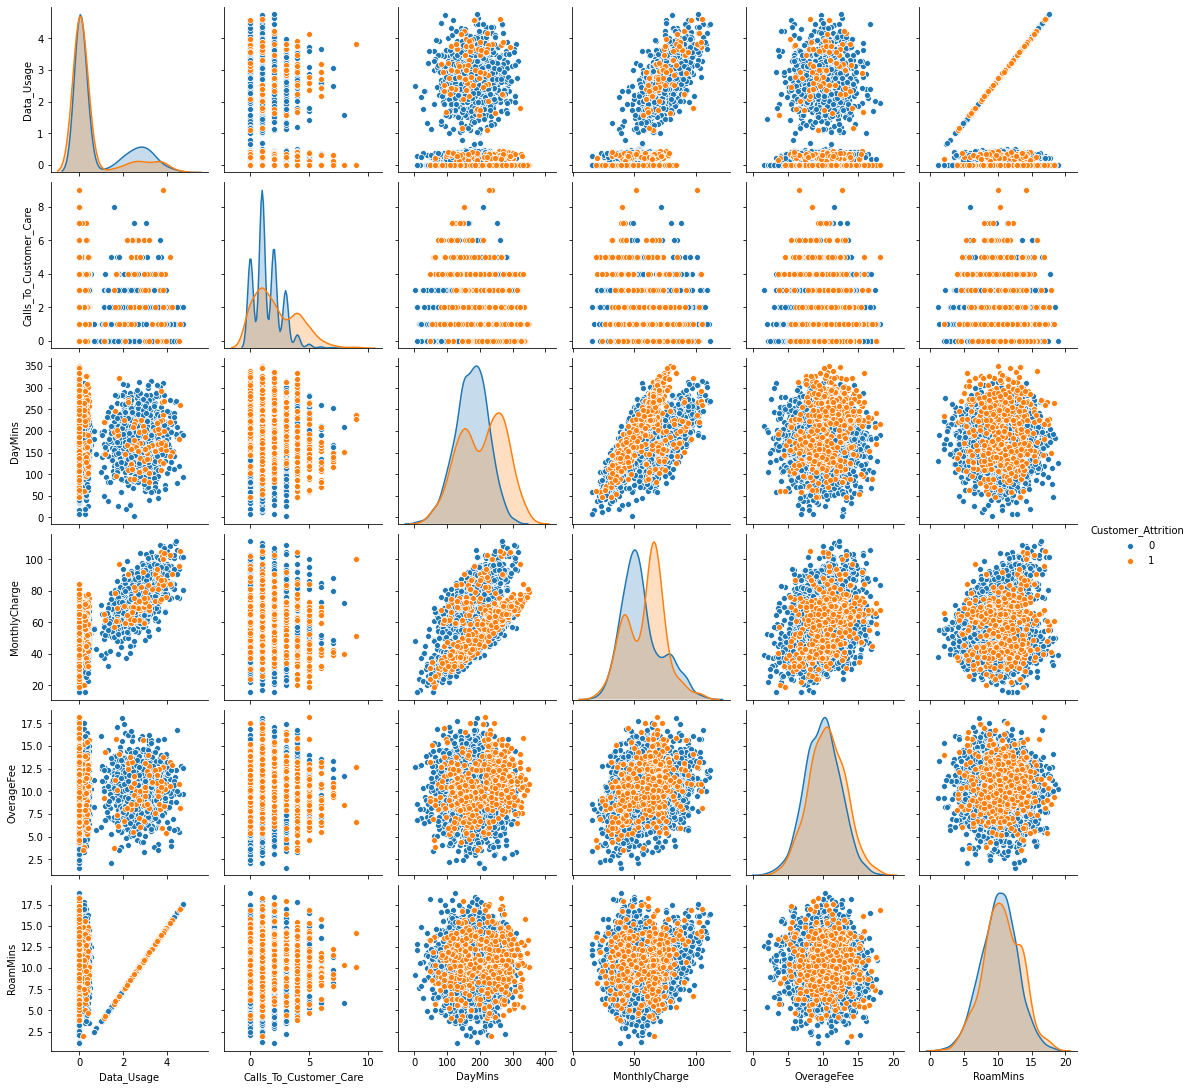

In [73]:
sns.pairplot(data=df, hue = 'Customer_Attrition', vars = useful_features)

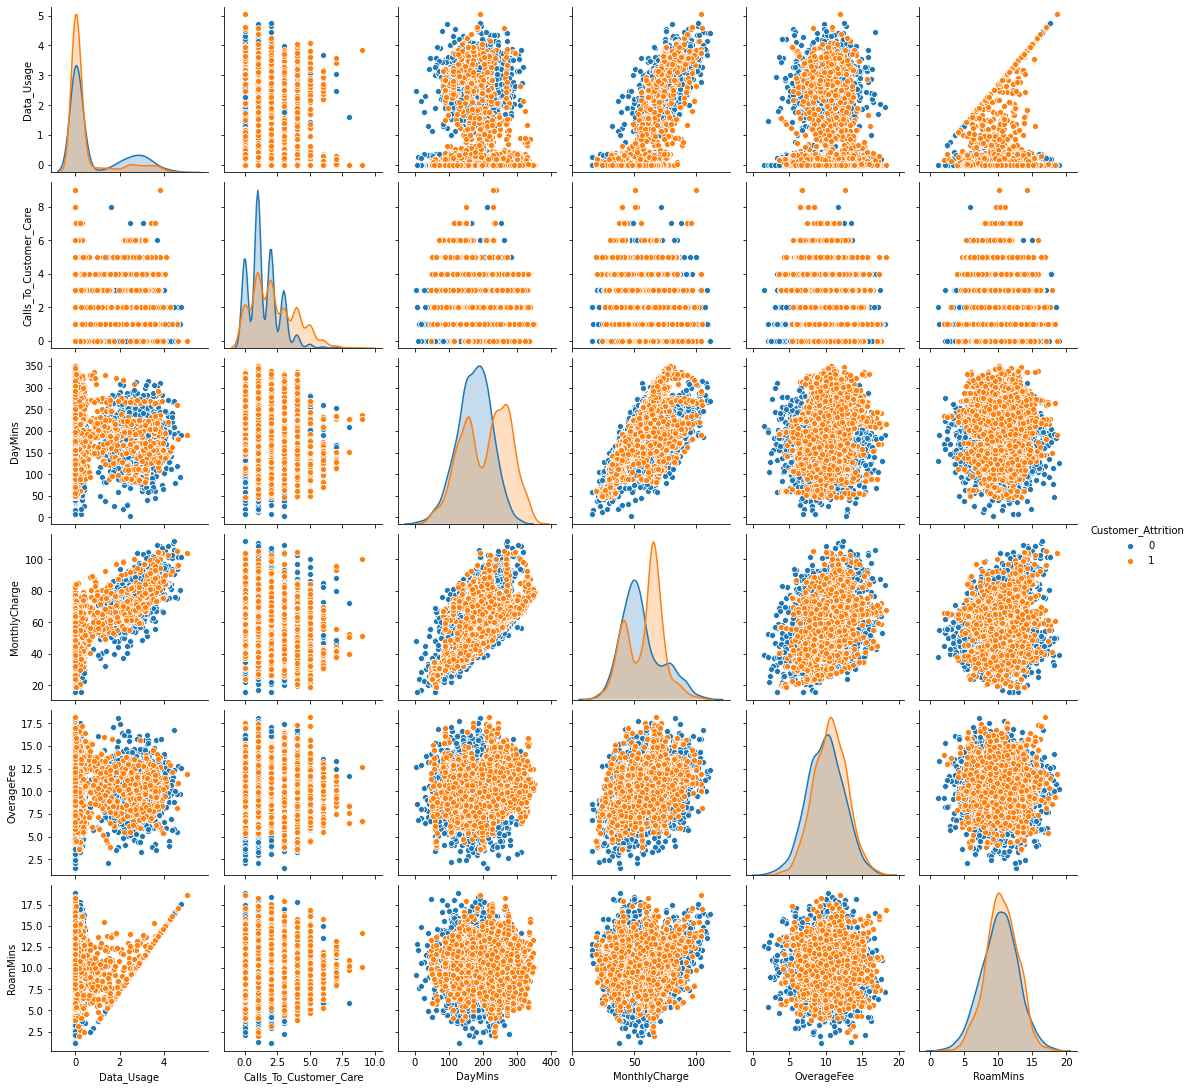

In [74]:
sns.pairplot(data=df_res, hue = 'Customer_Attrition', vars = useful_features)

## 9. Noramalize the data

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

### Origianal Data

In [76]:
Normalized_original_data = scaler.fit_transform(df.iloc[:, :-1])

In [78]:
# Only with the useful features as columns
Normalized_original_data_featuers = scaler.fit_transform(df[useful_features])

### Resampled Data

In [79]:
Normalized_resampled_data = scaler.fit_transform(df_res.iloc[:, :-1])

In [80]:
# Only with the useful features as columns
Normalized_resampled_data_features = scaler.fit_transform(df_res[useful_features])

## 10. Modelling

## 1.) Split the data into X and y

In [81]:
from sklearn.model_selection import train_test_split as tts

- #### Original Data

In [82]:
X_train_org, X_test_org, y_train_org, y_test_org = tts(Normalized_original_data, df.Customer_Attrition, test_size=0.25, random_state=42)
X_train_org.shape, X_test_org.shape

((2475, 10), (825, 10))

In [83]:
# Only with the useful features as columns
X_train_org_fet, X_test_org_fet, y_train_org_fet, y_test_org_fet = tts(Normalized_original_data_featuers, df.Customer_Attrition, test_size=0.25, random_state=42)
X_train_org_fet.shape, X_test_org_fet.shape

((2475, 6), (825, 6))

- #### Resampled Data

In [84]:
X_train_res, X_test_res, y_train_res, y_test_res = tts(Normalized_resampled_data, df_res.Customer_Attrition, test_size=0.25, random_state=42)
X_train_res.shape, X_test_res.shape

((4243, 10), (1415, 10))

In [85]:
# Only with the useful features as columns
X_train_res_fet, X_test_res_fet, y_train_res_fet, y_test_res_fet = tts(Normalized_resampled_data_features, df_res.Customer_Attrition, test_size=0.25, random_state=42)
X_train_res_fet.shape, X_test_res_fet.shape

((4243, 6), (1415, 6))

After Normalization, Four datasets are created:
- Normalized_original_data: Original data with all the features(columns).
- Normalized_original_data_features: Original data with only top features.
- Normalized_resampled_data: Resampled data with all the features.
- Normalized_resampled_data_features: Resampled data with only top features.

## 2.) Creating Models

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV, cross_val_score

def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier()
    
    # grid searh to choose the best (combination of) hyperparameters
    gs_knn=GridSearchCV(estimator= knn, param_grid={'n_neighbors':range(2,20)}, scoring='accuracy', cv=10)

    # nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
    gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

    # fit, and fit with best estimator
    gs_knn.fit(X_train, y_train)
    gs_knn_best=gs_knn.best_estimator_
    gs_knn_best.fit(X_train, y_train)
    
    print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
    print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
    print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))
    return gs_knn_best
    
def svm(X_train, X_test, y_train, y_test):
    svm = SVC(random_state=42, probability=True)

    # grid searh to choose the best (combination of) hyperparameters
    r=[0.1,1,10]
    pg_svm=[{'C':r, 'kernel':['linear']},{'C':r, 'gamma':r, 'kernel':['rbf']}]

    gs_svm=GridSearchCV(estimator= svm, param_grid= pg_svm, scoring='accuracy', cv=2)

    # nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
    gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

    # fit, and fit with best estimator
    gs_svm.fit(X_train, y_train)
    gs_svm_best=gs_svm.best_estimator_
    gs_svm_best.fit(X_train, y_train)

    print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(X_train, y_train)*100))
    print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_svm_scores)*100))
    print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(X_test, y_test)*100))
    return gs_svm_best
    
def Random_Forest(X_train, X_test, y_train, y_test):
    rf= RFC(random_state=42)

    # grid searh to choose the best (combination of) hyperparameters
    pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

    gs_rf=GridSearchCV(estimator= rf, param_grid= pg_rf, scoring='accuracy', cv=2)

    # nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
    gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

    # fit, and fit with best estimator
    gs_rf.fit(X_train, y_train)
    gs_rf_best=gs_rf.best_estimator_
    gs_rf_best.fit(X_train, y_train)

    print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
    print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
    print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test)*100))
    return gs_rf_best

### a. KNN

In [87]:
knn_org = knn(X_train_org, X_test_org, y_train_org, y_test_org)

Train Accuracy:   92.7%
CV Mean Accuracy: 89.3%
Test Accuracy:    90.4%


In [88]:
knn_org_fet = knn(X_train_org_fet, X_test_org_fet, y_train_org_fet, y_test_org_fet)

Train Accuracy:   92.7%
CV Mean Accuracy: 90.5%
Test Accuracy:    89.7%


In [89]:
knn_res = knn(X_train_res, X_test_res, y_train_res, y_test_res)

Train Accuracy:   97.0%
CV Mean Accuracy: 85.6%
Test Accuracy:    87.2%


In [90]:
knn_res_fet = knn(X_train_res_fet, X_test_res_fet, y_train_res_fet, y_test_res_fet)

Train Accuracy:   94.1%
CV Mean Accuracy: 82.5%
Test Accuracy:    83.3%


### b. SVM

In [91]:
svm_org = svm(X_train_org, X_test_org, y_train_org, y_test_org)

Train Accuracy:   93.5%
CV Mean Accuracy: 91.0%
Test Accuracy:    91.5%


In [92]:
svm_org_fet = svm(X_train_org_fet, X_test_org_fet, y_train_org_fet, y_test_org_fet)

Train Accuracy:   92.7%
CV Mean Accuracy: 91.9%
Test Accuracy:    90.9%


In [93]:
svm_res = svm(X_train_res, X_test_res, y_train_res, y_test_res)

Train Accuracy:   89.8%
CV Mean Accuracy: 86.0%
Test Accuracy:    85.7%


In [94]:
svm_res_fet = svm(X_train_res_fet, X_test_res_fet, y_train_res_fet, y_test_res_fet)

Train Accuracy:   85.7%
CV Mean Accuracy: 83.2%
Test Accuracy:    81.3%


### c. Random Forest

In [95]:
rf_org = Random_Forest(X_train_org, X_test_org, y_train_org, y_test_org)

Train Accuracy:   100.0%
CV Mean Accuracy: 93.8%
Test Accuracy:    93.0%


In [96]:
rf_org_fet = Random_Forest(X_train_org_fet, X_test_org_fet, y_train_org_fet, y_test_org_fet)

Train Accuracy:   100.0%
CV Mean Accuracy: 92.4%
Test Accuracy:    91.0%


In [97]:
rf_res = Random_Forest(X_train_res, X_test_res, y_train_res, y_test_res)

Train Accuracy:   100.0%
CV Mean Accuracy: 90.0%
Test Accuracy:    91.3%


In [98]:
rf_res_fet = Random_Forest(X_train_res_fet, X_test_res_fet, y_train_res_fet, y_test_res_fet)

Train Accuracy:   100.0%
CV Mean Accuracy: 86.9%
Test Accuracy:    87.5%


- Out of all of these the best results are given by Random Forest

## 3.) Result Matrices

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

### Confusion Matrix , Classification Report and ROC Curve

In [100]:
def Result_Matrices(model, X_test, y_test):
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    
    # Confusion Matrix
    print("Confusion Matrix--->")
    print(confusion_matrix(y_test, predictions))
    
    # Classification Report
    print("\nClassification Report--->")
    print(classification_report(y_test, predictions))
    
    # ROC Curve
    roc_value = roc_auc_score(y_test, probs)
    print("ROC value is :", roc_value)
    base_fpr, base_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate'); plt.title('ROC Curve')
    plt.show()

#### KNN

Confusion Matrix--->
[[698  12]
 [ 67  48]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       710
           1       0.80      0.42      0.55       115

    accuracy                           0.90       825
   macro avg       0.86      0.70      0.75       825
weighted avg       0.90      0.90      0.89       825

ROC value is : 0.8241396203306797


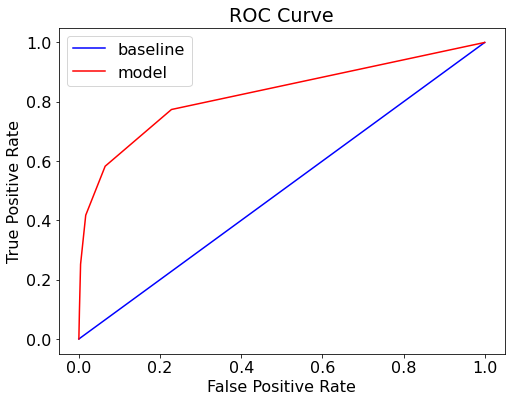

In [101]:
Result_Matrices(knn_org, X_test_org, y_test_org)

Confusion Matrix--->
[[701   9]
 [ 76  39]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       710
           1       0.81      0.34      0.48       115

    accuracy                           0.90       825
   macro avg       0.86      0.66      0.71       825
weighted avg       0.89      0.90      0.88       825

ROC value is : 0.7535517452541336


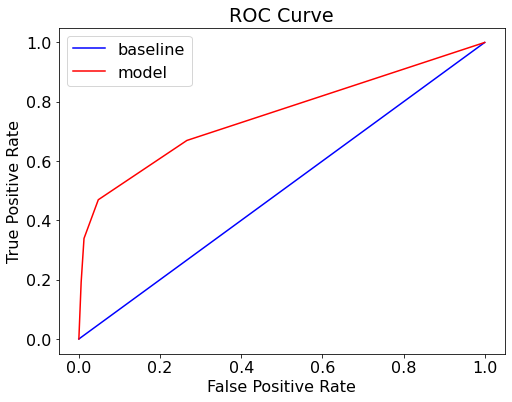

In [102]:
Result_Matrices(knn_org_fet, X_test_org_fet, y_test_org_fet)

Confusion Matrix--->
[[656  78]
 [103 578]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       734
           1       0.88      0.85      0.86       681

    accuracy                           0.87      1415
   macro avg       0.87      0.87      0.87      1415
weighted avg       0.87      0.87      0.87      1415

ROC value is : 0.9055934332825185


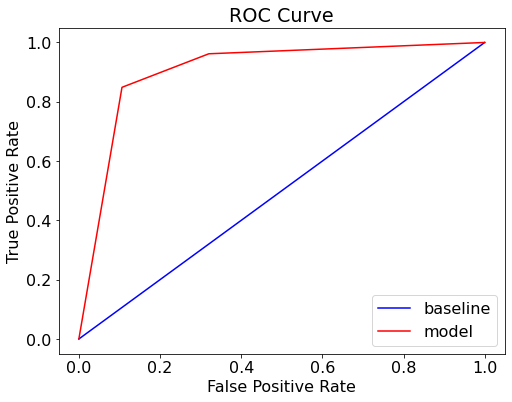

In [103]:
Result_Matrices(knn_res, X_test_res, y_test_res)

Confusion Matrix--->
[[646  88]
 [149 532]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       734
           1       0.86      0.78      0.82       681

    accuracy                           0.83      1415
   macro avg       0.84      0.83      0.83      1415
weighted avg       0.83      0.83      0.83      1415

ROC value is : 0.8710323414437016


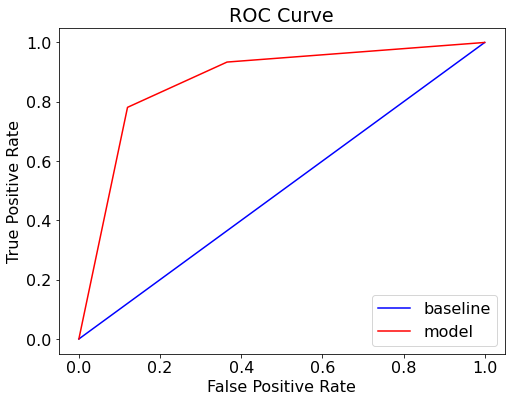

In [104]:
Result_Matrices(knn_res_fet, X_test_res_fet, y_test_res_fet)

#### SVM

Confusion Matrix--->
[[693  17]
 [ 53  62]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       710
           1       0.78      0.54      0.64       115

    accuracy                           0.92       825
   macro avg       0.86      0.76      0.80       825
weighted avg       0.91      0.92      0.91       825

ROC value is : 0.8583221065523576


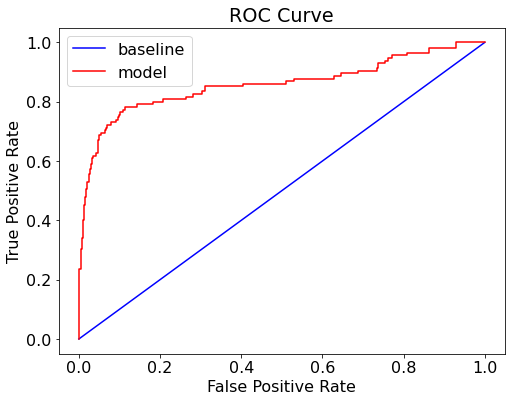

In [105]:
Result_Matrices(svm_org, X_test_org, y_test_org)

Confusion Matrix--->
[[702   8]
 [ 67  48]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       710
           1       0.86      0.42      0.56       115

    accuracy                           0.91       825
   macro avg       0.89      0.70      0.76       825
weighted avg       0.91      0.91      0.90       825

ROC value is : 0.8060379669320269


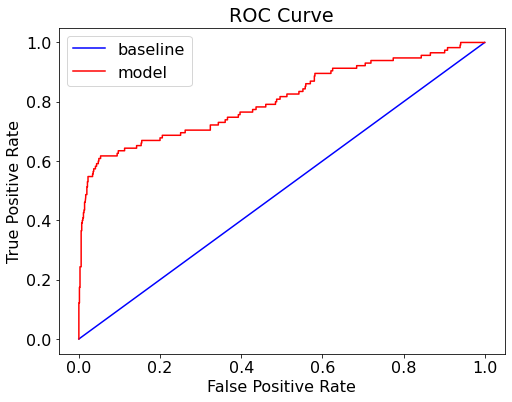

In [106]:
Result_Matrices(svm_org_fet, X_test_org_fet, y_test_org_fet)

Confusion Matrix--->
[[659  75]
 [127 554]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       734
           1       0.88      0.81      0.85       681

    accuracy                           0.86      1415
   macro avg       0.86      0.86      0.86      1415
weighted avg       0.86      0.86      0.86      1415

ROC value is : 0.9233216099100936


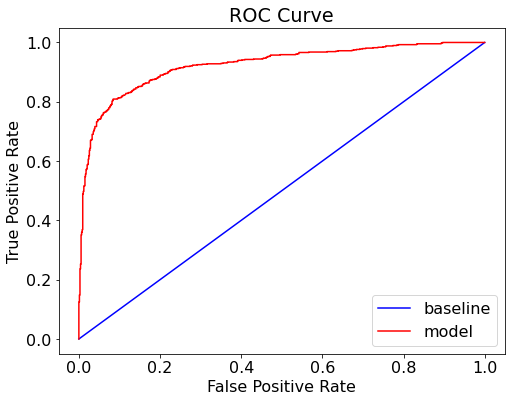

In [107]:
Result_Matrices(svm_res, X_test_res, y_test_res)

Confusion Matrix--->
[[645  89]
 [176 505]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       734
           1       0.85      0.74      0.79       681

    accuracy                           0.81      1415
   macro avg       0.82      0.81      0.81      1415
weighted avg       0.82      0.81      0.81      1415

ROC value is : 0.8998707622625807


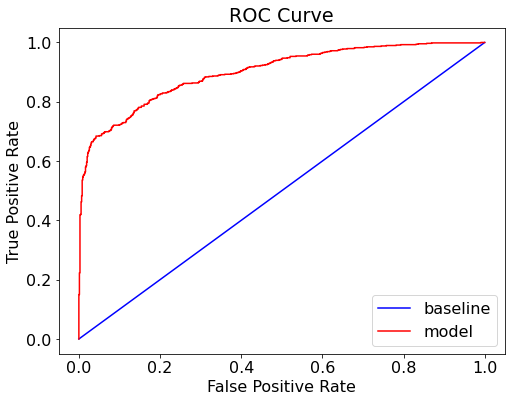

In [108]:
Result_Matrices(svm_res_fet, X_test_res_fet, y_test_res_fet)

#### Random Forest

Confusion Matrix--->
[[696  14]
 [ 44  71]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       710
           1       0.84      0.62      0.71       115

    accuracy                           0.93       825
   macro avg       0.89      0.80      0.83       825
weighted avg       0.93      0.93      0.93       825

ROC value is : 0.8869014084507043


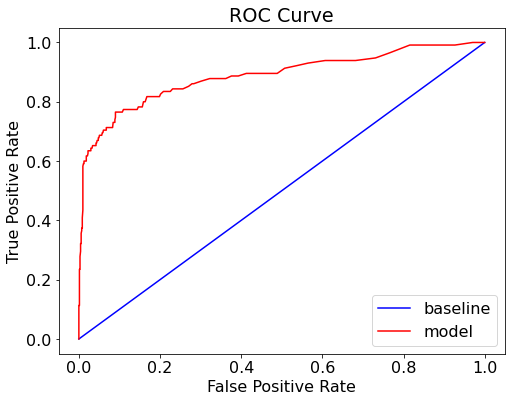

In [109]:
Result_Matrices(rf_org, X_test_org, y_test_org)

Confusion Matrix--->
[[694  16]
 [ 58  57]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.78      0.50      0.61       115

    accuracy                           0.91       825
   macro avg       0.85      0.74      0.78       825
weighted avg       0.90      0.91      0.90       825

ROC value is : 0.7823147581139008


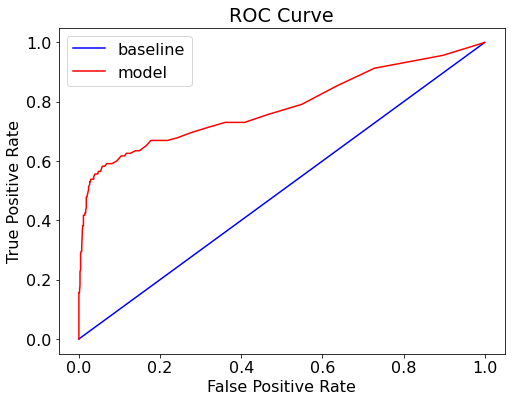

In [110]:
Result_Matrices(rf_org_fet, X_test_org_fet, y_test_org_fet)

Confusion Matrix--->
[[688  46]
 [ 77 604]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       734
           1       0.93      0.89      0.91       681

    accuracy                           0.91      1415
   macro avg       0.91      0.91      0.91      1415
weighted avg       0.91      0.91      0.91      1415

ROC value is : 0.972623005917728


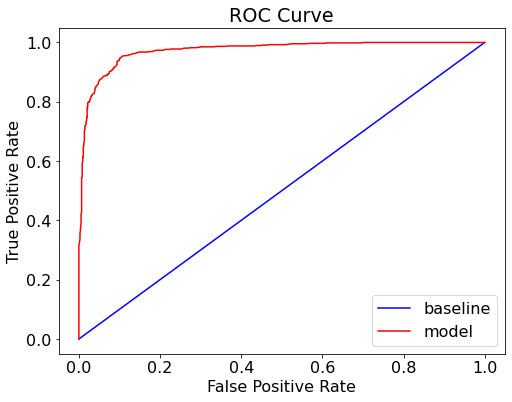

In [111]:
Result_Matrices(rf_res, X_test_res, y_test_res)

Confusion Matrix--->
[[675  59]
 [118 563]]

Classification Report--->
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       734
           1       0.91      0.83      0.86       681

    accuracy                           0.87      1415
   macro avg       0.88      0.87      0.87      1415
weighted avg       0.88      0.87      0.87      1415

ROC value is : 0.9464343588327792


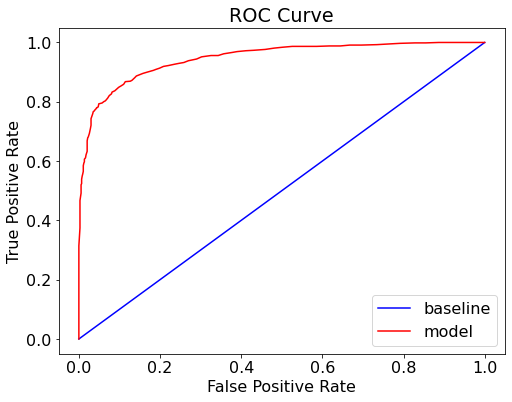

In [112]:
Result_Matrices(rf_res_fet, X_test_res_fet, y_test_res_fet)

- Out of all of the above Random Forest for Resampled Data performed the best.

## Let's Check the Feature Importance.

- use inbuilt class feature_importances of tree based classifiers
- plot graph of feature importances for better visualization

[0.07712829 0.02269218 0.02565301 0.09501246 0.15027306 0.19977206
 0.07203436 0.17878374 0.09032812 0.08832271]


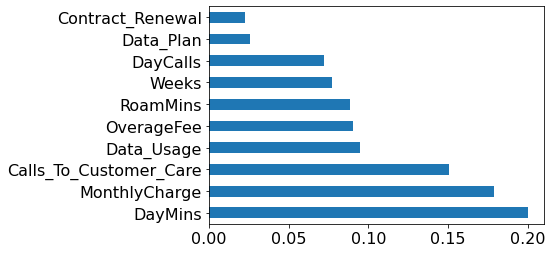

In [113]:
print(rf_res.feature_importances_)
feat_importances = pd.Series(rf_res.feature_importances_, index=df.iloc[:, :-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.06342431 0.06038563 0.03186273 0.07485801 0.14433912 0.21200343
 0.06300621 0.17079935 0.09538119 0.08394002]


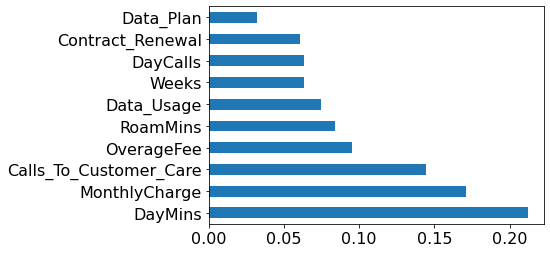

In [114]:
print(rf_org.feature_importances_)
feat_importances = pd.Series(rf_org.feature_importances_, index=df.iloc[:, :-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- The results showed that the top 6 features were the same that we chose earlier as Useful_features.
- Although the ROC scores for data with only Top features were a little lesser than that of all the columns but they had majority of data patterns and training on them will also be faster and cost efficient.